In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from PIL import Image
from pandas import read_csv

# from lmfit import Model, fit_report
# from lmfit.models import LinearModel
from scipy.signal import argrelextrema

import os
# import ipynbname
# notebook_path = os.path.abspath('h2_h3p_vel_compare.ipynb' + "/../")
# imgpath = os.path.join(os.path.dirname(notebook_path), 'plots/vprf')
# nb_path = str(ipynbname.path())
plots_dir = os.path.abspath('./../../plots/north/vprf')
figs_dir = os.path.abspath('./../../figures')


h2_vprf = fits.open('h2_vprf.fits', ignore_missing_end=True)[0].data
h3p_vprf = fits.open('h3p_vprf.fits', ignore_missing_end=True)[0].data
h2_verr = fits.open('h2_vprf_err.fits', ignore_missing_end=True)[0].data
h3p_verr = fits.open('h3p_vprf_err.fits', ignore_missing_end=True)[0].data
h2_int = fits.open('h2_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_int = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data
ref_sun = fits.open('ref_sun.fits', ignore_missing_end=True)[0].data

# lat = fits.open('latit.fits', ignore_missing_end=True)[0].data
# long = fits.open('longit.fits', ignore_missing_end=True)[0].data

cmlsel = read_csv('cml-sel.txt', sep='\s+', header=None)
cml = cmlsel[3].to_numpy()
sel = cmlsel[4].to_numpy()

vmp = 3.41*np.sin((185-cml)*(np.pi/180))*np.cos((sel)*(np.pi/180))

h2_vprf[h2_verr > 4] = np.nan
h3p_vprf[h3p_verr > 4] = np.nan

h2_vprf[h2_vprf > 6] = np.nan
h3p_vprf[h3p_vprf > 6] = np.nan
h2_vprf[h2_vprf < -6] = np.nan
h3p_vprf[h3p_vprf < -6] = np.nan

h2_vprf[:,:20] = np.nan
h3p_vprf[:,:20] = np.nan
h2_vprf[:,280:] = np.nan
h3p_vprf[:,280:] = np.nan

h2_verr[np.isnan(h2_vprf)] = np.nan
h3p_verr[np.isnan(h3p_vprf)] = np.nan
h2_int[np.isnan(h2_vprf)] = np.nan
h3p_int[np.isnan(h3p_vprf)] = np.nan

In [2]:
h2_vorf = fits.open('h2_vorf.fits', ignore_missing_end=True)[0].data
h3p_vorf = fits.open('h3p_vorf.fits', ignore_missing_end=True)[0].data
h2_vorf_err = fits.open('h2_vorf_err.fits', ignore_missing_end=True)[0].data
h3p_vorf_err = fits.open('h3p_vorf_err.fits', ignore_missing_end=True)[0].data

h2_vorf[h2_vorf_err > 4] = np.nan
h3p_vorf[h3p_vorf_err > 4] = np.nan

h2_vorf[h2_vorf > 8] = np.nan
h3p_vorf[h3p_vorf > 8] = np.nan
h2_vorf[h2_vorf < -8] = np.nan
h3p_vorf[h3p_vorf < -8] = np.nan

h2_vorf[:,:20] = np.nan
h3p_vorf[:,:20] = np.nan
h2_vorf[:,280:] = np.nan
h3p_vorf[:,280:] = np.nan

h2_vorf_err[np.isnan(h2_vorf)] = np.nan
h3p_vorf_err[np.isnan(h3p_vorf)] = np.nan

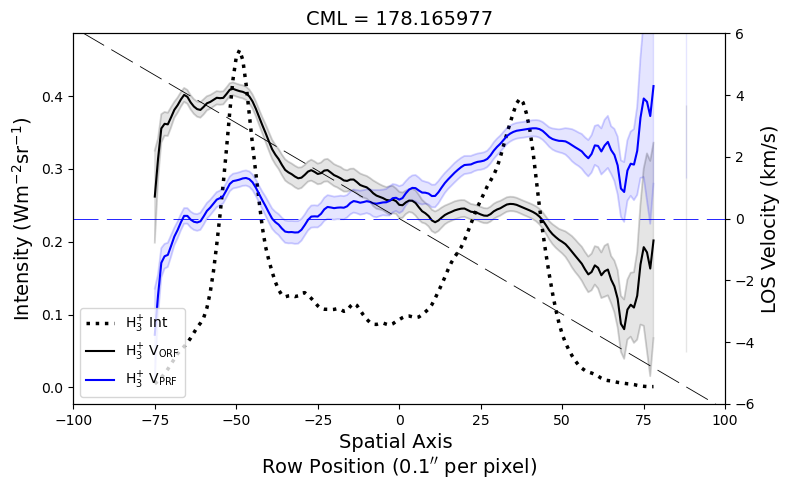

In [3]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(-150,150,301)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

a2 = h2_vprf*(-1)
b2 = h3p_vprf*(-1)

h2vo = h2_vorf*(-1)
h3vo = h3p_vorf*(-1)

c2 = b2 - a2
errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

# for i in range(len(h3p_vprf)):
for i in range(18, 19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-150,150,301)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (8, 5))
        plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vh2 = a2[i]
        vh2max = a2[i] + h2_verr[i]
        vh2min = a2[i] - h2_verr[i]
        
        vh3p = b2[i]
        vh3pmax = b2[i] + h3p_verr[i]
        vh3pmin = b2[i] - h3p_verr[i]
        
        ax2 = ax.twinx()
        
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$ Int', lw=2.5)
#         ax.plot(xnew, int2[i], color='orange', ls='-.', label='Ref Sun', lw=1)
        
#         ax2.plot(xnew, vh2, color='red', label='H$_2$')        
#         ax2.plot(xnew, vh2max, color='mistyrose')
#         ax2.plot(xnew, vh2min, color='mistyrose')
#         ax2.fill_between(xnew, vh2min, vh2max, color='mistyrose')

        ax2.plot(xnew, h3vo[i], color='black', label='H$_3^{+}$ V$_{\mathrm{ORF}}$')
        ax2.plot(xnew, h3vo[i]+h3p_vorf_err[i], color='black', alpha=0.1)
        ax2.plot(xnew, h3vo[i]-h3p_vorf_err[i], color='black', alpha=0.1)
        ax2.fill_between(xnew, h3vo[i]-h3p_vorf_err[i], h3vo[i]+h3p_vorf_err[i], color='black', alpha=0.1)
        
        ax2.plot(xnew, vh3p, color='blue', label='H$_3^{+}$ V$_{\mathrm{PRF}}$')
        ax2.plot(xnew, vh3pmax, color='blue', alpha=0.1)
        ax2.plot(xnew, vh3pmin, color='blue', alpha=0.1)
        ax2.fill_between(xnew, vh3pmin, vh3pmax, color='blue', alpha=0.1)
        
        ax2.plot(xnew, -rot_rate, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='r', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='b', ecolor='lightblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c2[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')

#         ax2.text(-98, 0.2, 'DAWN', fontsize = 15)
#         ax2.text(85, 0.2, 'DUSK', fontsize = 15)
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
#         ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        ax2.set_ylabel('LOS Velocity (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
#         plt.axhline(y=vmp[i], color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#         plt.text(-145,vmp[i]-0.7, 'V$_{\mathrm{mp}}$ = '+str(round(vmp[i], 4)), fontsize=14)
        plt.axhline(y=0, color='blue', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(-100,100)
        plt.ylim(-6,6)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=3)
        
        plt.tight_layout()
#         plt.savefig(plots_dir+'/h3p_vprf_fr'+str(i), dpi=400, bbox_inches='tight', facecolor='white')
#         plt.savefig(plots_dir+'/h3p_vprf_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

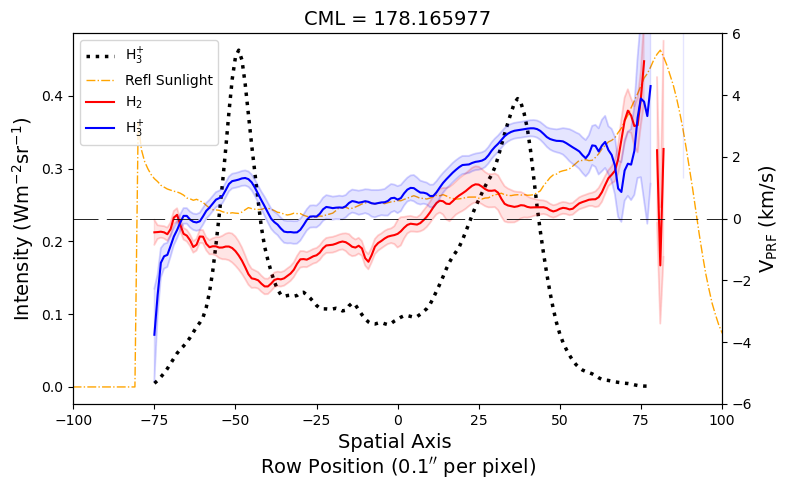

In [4]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(-150,150,301)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

a2 = h2_vprf*(-1)
b2 = h3p_vprf*(-1)

# for i in range(len(h3p_vprf)):
for i in range(18, 19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-150,150,301)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (8, 5))
        plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vh2 = a2[i]
        vh2max = a2[i] + h2_verr[i]
        vh2min = a2[i] - h2_verr[i]
        
        vh3p = b2[i]
        vh3pmax = b2[i] + h3p_verr[i]
        vh3pmin = b2[i] - h3p_verr[i]
        
        ax2 = ax.twinx()
        
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        
        ax2.plot(xnew, vh2, color='red', label='H$_2$')        
        ax2.plot(xnew, vh2max, color='red', alpha=0.1)
        ax2.plot(xnew, vh2min, color='red', alpha=0.1)
        ax2.fill_between(xnew, vh2min, vh2max, color='red', alpha=0.1)
        
        ax2.plot(xnew, vh3p, color='blue', label='H$_3^{+}$')
        ax2.plot(xnew, vh3pmax, color='blue', alpha=0.1)
        ax2.plot(xnew, vh3pmin, color='blue', alpha=0.1)
        ax2.fill_between(xnew, vh3pmin, vh3pmax, color='blue', alpha=0.1)
        
#         ax2.plot(xnew, -rot_rate, color='black', ls='dashed', dashes=(30, 10), lw=1)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='r', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='b', ecolor='lightblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c2[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
#         plt.axhline(y=vmp[i], color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#         plt.text(-145,vmp[i]-0.7, 'V$_{\mathrm{mp}}$ = '+str(round(vmp[i], 4)), fontsize=14)
        plt.axhline(y=0, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(-100,100)
        plt.ylim(-6,6)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=2)
        
        plt.tight_layout()
#         plt.savefig(plots_dir+'/h2_h3p_vprf_fr'+str(i), dpi=400, bbox_inches='tight', facecolor='white')
#         plt.savefig(plots_dir+'/h2_h3p_vprf_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

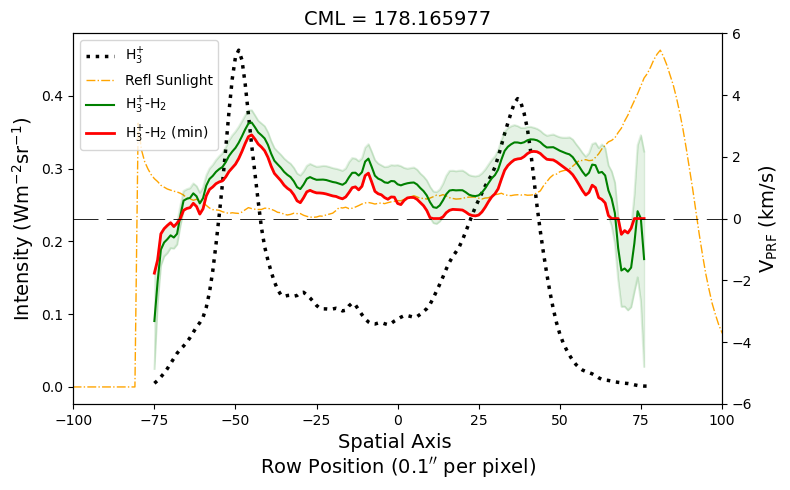

In [5]:
c2 = b2 - a2
errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

c3 = c2 + 0
c_min = c2 - errc2
c_max = c2 + errc2
c_max_t = c3/c_max
c_min_t = c3/c_min
c_max_t[c_max_t <0] = 0
c_min_t[c_min_t <0] = 0
m3 = c_max_t * c_min_t

m3[m3 > 0] = 1

d3 = c3 * m3
d3a = c_min * m3
d3b = c_max * m3

e3 = c3 *0
e3[d3 > 0] = c_min[d3 > 0]
e3[d3 < 0] = c_max[d3 < 0]

# for i in range(len(h3p_vprf)):
for i in range(18,19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-150,150,301)
#         int2 = (h3p_int/np.nanmax(h3p_int[i])*7.9-3.95)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
#         fig, ax = plt.subplots(figsize = (12, 4))
        fig, ax = plt.subplots(figsize = (8, 5))
        plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vcur = c2[i]
        vcurmax = c2[i] + errc2[i]
        vcurmin = c2[i] - errc2[i]
        
        ax2 = ax.twinx()
        
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        
        ax2.plot(xnew, vcur, color='green', label='H$_3^{+}$-H$_2$')        
        ax2.plot(xnew, vcurmax, color='green', alpha=0.1)
        ax2.plot(xnew, vcurmin, color='green', alpha=0.1)
        ax2.fill_between(xnew, vcurmin, vcurmax, color='green', alpha=0.1)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='palesalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='paleblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c3[i], yerr=errc2[i], color='green', ecolor='palegreen', label='H$_3^{+}$-H$_2$')
        ax2.plot(xnew, e3[i], color='red', ls='-', label='H$_3^{+}$-H$_2$ (min)', lw=2)
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        plt.axhline(y=0, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#         plt.xlim(-150,150)
#         plt.ylim(-4,4)
        plt.xlim(-100,100)
        plt.ylim(-6,6)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=2)
        
        plt.tight_layout()
#         plt.savefig(plots_dir+'/curr_fr'+str(i), dpi=400, bbox_inches='tight', facecolor='white')
#         plt.savefig(plots_dir+'/curr_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

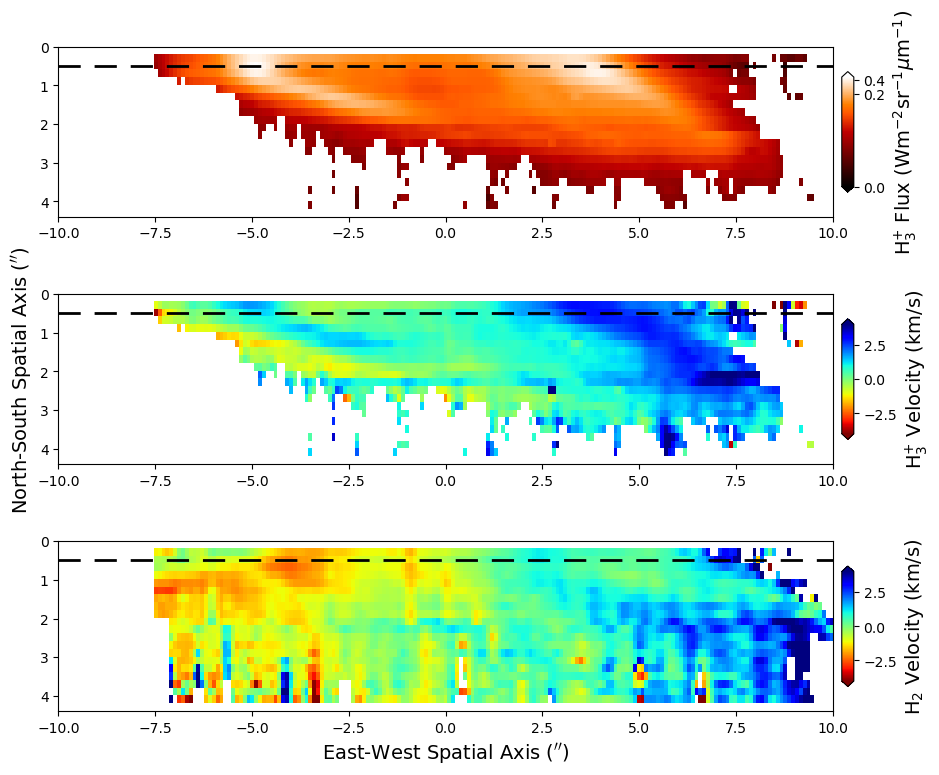

In [6]:
h3p_int2 = np.delete(h3p_int, np.s_[:16], axis=0)
h3p_vprf2 = np.delete(b2, np.s_[:16], axis=0)
h2_int2 = np.delete(h2_int, np.s_[:16], axis=0)
h2_vprf2 = np.delete(a2, np.s_[:16], axis=0)
curr2 = np.delete(c3, np.s_[:16], axis=0)
curr_min2 = np.delete(e3, np.s_[:16], axis=0)

h3p_int_rs = np.array(Image.fromarray(h3p_int2).resize(size=(301, 44), resample=0))
h3p_vprf_rs = np.array(Image.fromarray(h3p_vprf2).resize(size=(301, 44), resample=0))
h2_int_rs = np.array(Image.fromarray(h2_int2).resize(size=(301, 44), resample=0))
h2_vprf_rs = np.array(Image.fromarray(h2_vprf2).resize(size=(301, 44), resample=0))
curr_rs = np.array(Image.fromarray(curr2).resize(size=(301, 44), resample=0))
curr_min_rs = np.array(Image.fromarray(curr_min2).resize(size=(301, 44), resample=0))

# h3p_int_rs = scipy.ndimage.zoom(h3p_int2, [2,1], mode='constant')
# h3p_vprf_rs = scipy.ndimage.zoom(h3p_vprf2, [2,1], mode='constant')
# h2_int_rs = scipy.ndimage.zoom(h2_int2, [2,1], mode='constant')
# h2_vprf_rs = scipy.ndimage.zoom(h2_vprf2, [2,1], mode='constant')
# curr_rs = scipy.ndimage.zoom(curr2, [2,1], mode='constant')
# curr_min_rs = scipy.ndimage.zoom(curr_min2, [2,1], mode='constant')

fig = plt.figure(figsize=(10,8), tight_layout=True, facecolor='white')

# fig, ax = plt.subplots(figsize=(15,8), tight_layout=True, facecolor='white')

# ax2 = ax.twinx()


# ax1 = plt.subplot(321)
fig.add_subplot(311)
# plt.subplot(311)
plt.imshow(h3p_int_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
#            extent=[-150, 150, 146.0669, 189.0669], 
           extent=[-15,15,4.4,0],
           norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
plt.xlim(-10,10)
# plt.xlim(50,250)
plt.plot(np.linspace(-10,10,201),np.ones(201)*0.5, color='black', ls='dashed', dashes=(8, 5), lw=2)
# plt.title('a', loc='left', fontsize=16, fontweight='bold')
# plt.ylabel('Spatial Axis (0.1$^{\prime\prime}$)', fontsize=14)
# plt.ylabel('Frame Number \n(2 pixels / frame)', fontsize=14)
# plt.title('Intensity: H$_3^{+}$', loc='left', fontsize=16)
plt.colorbar(extend='both', 
             aspect=10, 
             pad=0.01, 
             shrink=0.5).set_label(label='H$_3^{+}$ Flux (Wm$^{-2}$sr$^{-1}$$\mu$m$^{-1}$)',size=14)

# plt.contour(lat, np.linspace(-90, 90, 19), colors='blue', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
# plt.contour(long, np.linspace(0,360,25), colors='cyan', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
# plt.contour(long, np.linspace(0,360,5), colors='blue', origin='upper', extent=[-150, 150, 145.0669, 189.0669])

# ax1 = plt.subplot(322)
fig.add_subplot(312)
# plt.subplot(312)
plt.imshow(h3p_vprf2, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r', 
#            extent=[-150, 150, 146.0669, 189.0669], 
           extent=[-15,15,4.4,0],
           vmin=-4, 
           vmax=4)
# # plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# # plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
# # plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# # plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=16)
plt.xlim(-10,10)
plt.plot(np.linspace(-10,10,201),np.ones(201)*0.5, color='black', ls='dashed', dashes=(8, 5), lw=2)
plt.ylabel('North-South Spatial Axis ($^{\prime\prime}$)', fontsize=14)
# plt.ylabel('Frame Number \n(2 pixels / frame)', fontsize=14)
# plt.title('b', loc='left', fontsize=16, fontweight='bold')
# plt.title('d) V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$', loc='left', fontsize=14)
plt.colorbar(extend='both', aspect=10, pad=0.01, shrink=0.5).set_label(label='H$_3^{+}$ Velocity (km/s)',size=14)

# ax1 = plt.subplot(323)
fig.add_subplot(313)
# plt.subplot(313)
plt.imshow(h2_vprf_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r',
#            extent=[-150, 150, 146.0669, 189.0669],
           extent=[-15,15,4.4,0],
           vmin=-4, 
           vmax=4)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
plt.xlim(-10,10)
plt.plot(np.linspace(-10,10,201),np.ones(201)*0.5, color='black', ls='dashed', dashes=(8, 5), lw=2)
# plt.ylabel('Spatial Axis (0.1$^{\prime\prime}$)', fontsize=14)
plt.xlabel('East-West Spatial Axis ($^{\prime\prime}$)', fontsize=14)
# plt.ylabel('Frame Number \n(2 pixels / frame)', fontsize=14)
# plt.title('c', loc='left', fontsize=16, fontweight='bold')
# plt.title('V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=16)
plt.colorbar(extend='both', aspect=10, pad=0.01, shrink=0.5).set_label(label='H$_2$ Velocity (km/s)',size=14)

# ax2 = plt.subplot(211)
# # fig.add_subplot(211)
# ax2.imshow(curr_rs)

# ax5 = plt.subplot(222)
# ax5.imshow(curr_min_rs)
# fig.add_subplot(212)
# ax2.imshow(curr_min_rs)

# fig.supxlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# fig.supylabel('Frame Number', fontsize=14)
# plt.savefig(figs_dir+'/fig1a.pdf', dpi=600, bbox_inches='tight', facecolor='white')
# plt.savefig(figs_dir+'/fig1a.png', dpi=600, bbox_inches='tight', facecolor='white')

In [7]:
len(h3p_int2)

22

[179 194 198 201 207]
[183 188 190 194 197 201 210]
[183 195 199 212]
[171 191 202 210 218]
[175 177 180 187 195 210 219]
[171 194 198 213 218 232]


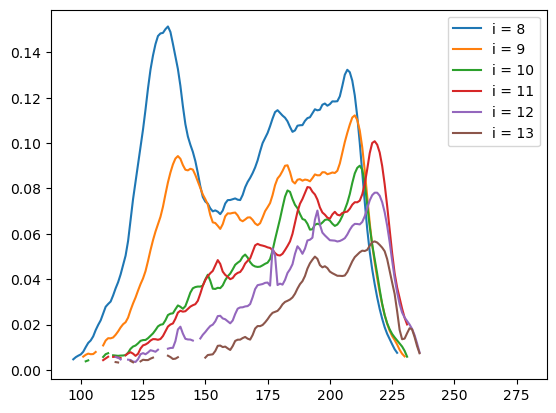

In [182]:
# for i in range(len(h3p_int2)):
for i in range(8,14):
    y = h3p_int2[i]
    x = np.linspace(-15,15, len(y))
    
#     if i <= 7:
    # plt.plot(x, h3p_int2[1])
    plt.plot(y, label='i = '+str(i))
#     print(argrelextrema(y[:], np.greater))
    print(argrelextrema(y[170:], np.greater)[0]+170)
    plt.legend()
        
#     if i > 6 and i <=

In [53]:
peak1 = np.array([101,101,101,103,112,121,127,134,140,151,155])
peak2 = np.array([183,187,190,192,197,201,205,207,210,212,218,219,218])

array([2, 4, 6, 8])

In [ ]:
peak1 = np.zeros(22)
peak2 = np.zeros(22)

In [50]:
peak1

array([  0.,  96.,  88.,  81.,  78.,  78.,  81.,  84.,  88.,  93.,  99.,
        99.,  89.,   0., 105.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [21]:
peak1 = np.zeros(22)
peak2 = np.zeros(22)

for i in range(len(h3p_int)):
    x = h3p_int[i]
    skip = [0,13,15,16,29,37]
    if i not in skip and i < 15:
        print('i = ' + str(i))
        print(argrelextrema(x[0:110], np.greater))
        print(argrelextrema(x[75:110], np.greater)[0][0]+75)
        peak1[i] = argrelextrema(x[75:110], np.greater)[0][0]+75
#     if i == 13:
#         # print('i = ' + str(i))
#         # print(argrelextrema(x[0:110], np.greater))
#         peak1[i] = 100
#     if i not in skip and i > 14 and i < 24:
#         # print('i = ' + str(i))
#         # print(argrelextrema(x[0:160], np.greater))
#         # print(argrelextrema(x[90:160], np.greater)[0][0]+90)
#         peak1[i] = argrelextrema(x[90:160], np.greater)[0][0]+90
#     if i not in skip and i > 23 and i < 26:
#         # print('i = ' + str(i))
#         # print(argrelextrema(x[0:160], np.greater))
#         # print(argrelextrema(x[115:160], np.greater)[0][0]+115)
#         peak1[i] = argrelextrema(x[115:160], np.greater)[0][0]+115
#     if i not in skip and i > 25 and i < 29:
#         # print('i = ' + str(i))
#         # print(argrelextrema(x[0:200], np.greater))
#         # print(argrelextrema(x[180:200], np.greater)[0][0]+180)
#         peak1[i] = argrelextrema(x[180:200], np.greater)[0][0]+180
#     if i == 29:
#         # print('i = ' + str(i))
#         # print(argrelextrema(x[0:200], np.greater))
#         peak1[i] = 190
#     if i not in skip and i > 29 and i < 32:
#         # print('i = ' + str(i))
#         # print(argrelextrema(x[0:200], np.greater))
#         # print(argrelextrema(x[192:200], np.greater)[0][0]+192)
#         peak1[i] = argrelextrema(x[192:200], np.greater)[0][0]+192
#     if i not in skip and i > 31:
#         peak1[i] = np.nan

# peak1[peak1<1] = np.nan

# for i in range(len(h3p_int)):
#     y = h3p_int[i]
#     skip = [0,15,16,37]
#     if i not in skip and i < 9:
#         # print('i = ' + str(i))
#         # print(argrelextrema(y[0:200], np.greater))
#         # print(argrelextrema(y[152:200], np.greater)[0][0]+152)
#         peak2[i] = argrelextrema(y[152:200], np.greater)[0][0]+152
#     if i not in skip and i >= 9 and i < 15:
#         # print('i = ' + str(i))
#         # print(argrelextrema(y[0:200], np.greater))
#         # print(argrelextrema(y[145:180], np.greater)[0][0]+145)
#         peak2[i] = argrelextrema(y[145:180], np.greater)[0][0]+145
#     if i not in skip and i >= 15 and i < 24:
#         # print('i = ' + str(i))
#         # print(argrelextrema(y[0:240], np.greater))
#         # print(argrelextrema(y[182:220], np.greater)[0][0]+182)
#         peak2[i] = argrelextrema(y[182:220], np.greater)[0][0]+182
#     if i not in skip and i >= 24 and i < 30:
#         # print('i = ' + str(i))
#         # print(argrelextrema(y[0:240], np.greater))
#         # print(argrelextrema(y[203:240], np.greater)[0][0]+203)
#         peak2[i] = argrelextrema(y[203:240], np.greater)[0][0]+203
#     if i not in skip and i >= 30 and i < 32:
#         # print('i = ' + str(i))
#         # print(argrelextrema(y[0:240], np.greater))
#         # print(argrelextrema(y[211:240], np.greater)[0][0]+211)
#         peak2[i] = argrelextrema(y[211:240], np.greater)[0][0]+211
#     if i == 32:
#         # print('i = ' + str(i))
#         # print(argrelextrema(y[0:240], np.greater))
#         peak2[i] = 216
# #     if i not in skip and i >= 33 and i < 35:
# #         # print('i = ' + str(i))
# #         # print(argrelextrema(y[0:240], np.greater))
# #         # print(argrelextrema(y[214:240], np.greater)[0][0]+214)
# #         peak2[i] = argrelextrema(y[214:240], np.greater)[0][0]+214
#     if i not in skip and i >= 35:
#         peak2[i] = np.nan
    
# peak2[peak2<1] = np.nan
# # peak2

# peak1[26:] = np.nan
# peak2[28:] = np.nan
# peak1[11:16] = np.nan
# peak2[10:16] = np.nan
# # peak2

# # for i in range(len(h3p_int)):
# #     y = h3p_int[i]
# #     skip = [0,15,16,37]
# #     if i not in skip and i >= 33 and i < 35:
# #         # print('i = ' + str(i))
# #         # print(argrelextrema(y[0:240], np.greater))
# #         # print(argrelextrema(y[214:240], np.greater)[0][0]+214)

# peak11 = np.delete(peak1, np.s_[:16], axis=0)
# peak22 = np.delete(peak2, np.s_[:16], axis=0)

i = 1
(array([58, 96]),)
96
i = 2
(array([53, 88]),)
88
i = 3
(array([81]),)
81
i = 4
(array([52, 78, 97]),)
78
i = 5
(array([78]),)
78
i = 6
(array([37, 81]),)
81
i = 7
(array([84]),)
84
i = 8
(array([38, 88]),)
88
i = 9
(array([93]),)
93
i = 10
(array([99]),)
99
i = 11
(array([99]),)
99
i = 12
(array([ 89, 103]),)
89
i = 14
(array([ 30, 105]),)
105


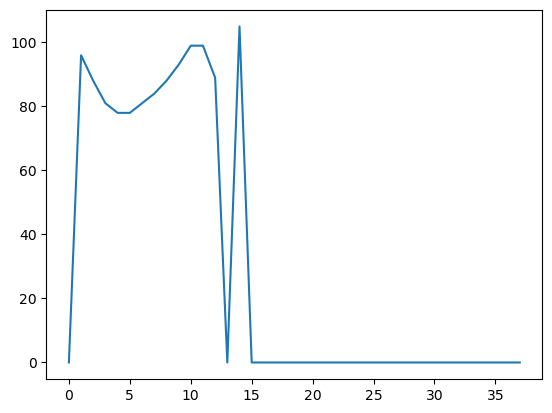

In [22]:
plt.plot(peak1)

In [69]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

Text(0, 0.5, 'common Y')

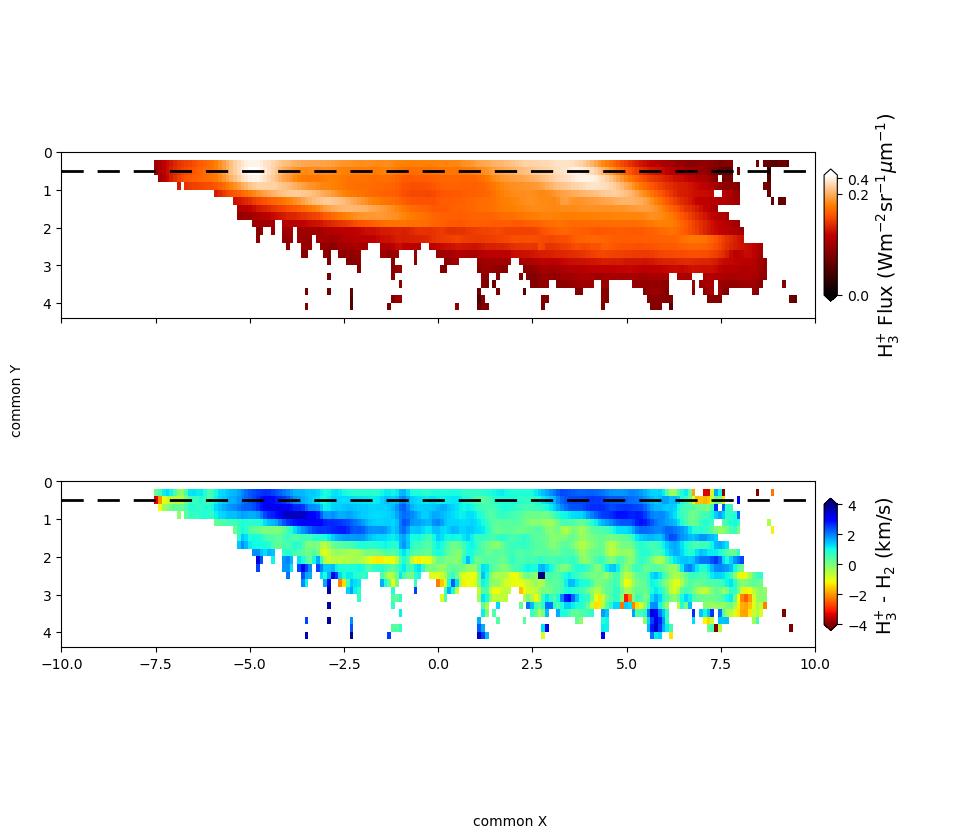

In [83]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), tight_layout=True, facecolor='white')

im1 = ax[0].imshow(h3p_int_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
#            extent=[-150, 150, 146.0669, 189.0669], 
           extent=[-15,15,4.4,0],
           norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
ax[0].set_xlim(-10,10)
# plt.xlim(50,250)
ax[0].plot(np.linspace(-10,10,201),np.ones(201)*0.5, color='black', ls='dashed', dashes=(8, 5), lw=2)
# plt.title('a', loc='left', fontsize=16, fontweight='bold')
# plt.ylabel('Spatial Axis (0.1$^{\prime\prime}$)', fontsize=14)
# plt.ylabel('Frame Number \n(2 pixels / frame)', fontsize=14)
# plt.title('Intensity: H$_3^{+}$', loc='left', fontsize=16)
plt.colorbar(im1, ax=ax[0], extend='both', 
             aspect=10, 
             pad=0.01, 
             shrink=0.3).set_label(label='H$_3^{+}$ Flux (Wm$^{-2}$sr$^{-1}$$\mu$m$^{-1}$)',size=14)

im2 = ax[1].imshow(curr_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r',
#            extent=[-150, 150, 146.0669, 189.0669],
           extent=[-15,15,4.4,0],
           vmin=-4, 
           vmax=4)
# plt.plot(peak11-15, range(18, 19-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-15, range(18, 19-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
ax[1].set_xlim(-10,10)
ax[1].plot(np.linspace(-10,10,201),np.ones(201)*0.5, color='black', ls='dashed', dashes=(8, 5), lw=2)

plt.colorbar(im2, ax=ax[1], extend='both', aspect=10, pad=0.01, shrink=0.3).set_label(label='H$_3^{+}$ - H$_2$ (km/s)',size=14)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("common X")
plt.ylabel("common Y")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.canvas.print_figure(bytes_io, **kw)


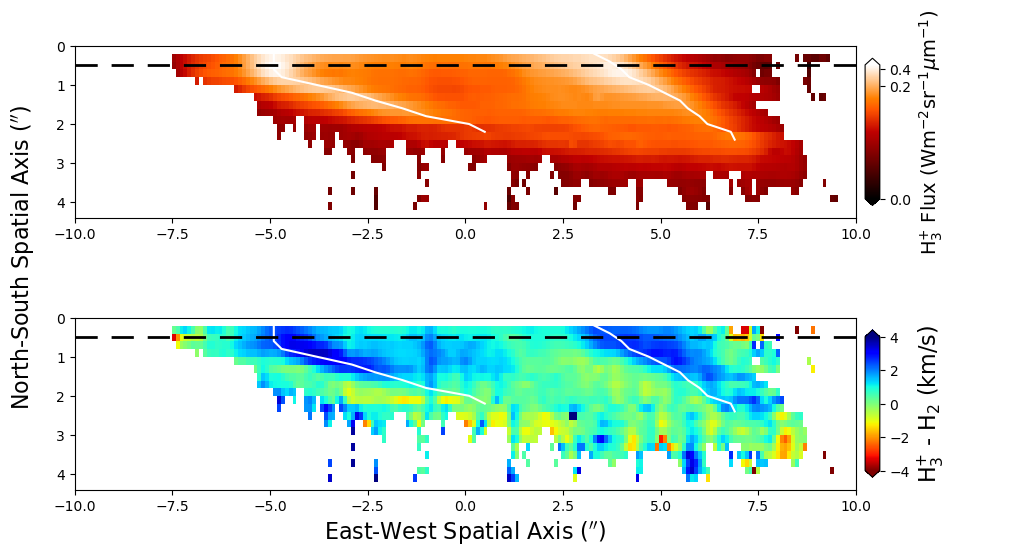

In [85]:
peak1 = np.array([np.nan,101,101,101,103,112,121,127,134,140,151,155])
peak2 = np.array([np.nan,183,187,190,192,197,201,205,207,210,212,218,219])

fig = plt.figure(figsize=(12,10), tight_layout=True, facecolor='white')

fig.add_subplot(311)
# plt.subplot(311)
plt.imshow(h3p_int_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
#            extent=[-150, 150, 146.0669, 189.0669], 
           extent=[-15,15,4.4,0],
           norm=colors.PowerNorm(gamma=0.2))
plt.plot((peak1-150)/10, np.linspace(0,2.2,len(peak1)), ls='-', lw=1.5, color='white')
plt.plot((peak2-150)/10, np.linspace(0,2.4,len(peak2)), ls='-', lw=1.5, color='white')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
plt.xlim(-10,10)
# plt.xlim(50,250)
plt.plot(np.linspace(-10,10,201),np.ones(201)*0.5, color='black', ls='dashed', dashes=(8, 5), lw=2)
# plt.title('a', loc='left', fontsize=16, fontweight='bold')
# plt.ylabel('Spatial Axis (0.1$^{\prime\prime}$)', fontsize=14)
# plt.ylabel('Frame Number \n(2 pixels / frame)', fontsize=14)
# plt.title('Intensity: H$_3^{+}$', loc='left', fontsize=16)
plt.colorbar(extend='both', 
             aspect=10, 
             pad=0.01, 
             shrink=0.65).set_label(label='H$_3^{+}$ Flux (Wm$^{-2}$sr$^{-1}$$\mu$m$^{-1}$)',size=14)



fig.add_subplot(312)
# plt.subplot(313)
plt.imshow(curr_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r',
#            extent=[-150, 150, 146.0669, 189.0669],
           extent=[-15,15,4.4,0],
           vmin=-4, 
           vmax=4)
plt.plot((peak1-150)/10, np.linspace(0,2.2,len(peak1)), ls='-', lw=1.5, color='white')
plt.plot((peak2-150)/10, np.linspace(0,2.4,len(peak2)), ls='-', lw=1.5, color='white')
plt.xlim(-10,10)
plt.plot(np.linspace(-10,10,201),np.ones(201)*0.5, color='black', ls='dashed', dashes=(8, 5), lw=2)
# plt.ylabel('North-South Spatial Axis ($^{\prime\prime}$)', fontsize=14)
plt.xlabel('East-West Spatial Axis ($^{\prime\prime}$)', fontsize=16)
# plt.ylabel('Frame Number \n(2 pixels / frame)', fontsize=13)
# plt.title('c', loc='left', fontsize=16, fontweight='bold')
# plt.title('V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=16)
plt.colorbar(extend='both', aspect=10, pad=0.01, shrink=0.65).set_label(label='H$_3^{+}$ - H$_2$ (km/s)',size=16)

fig.add_subplot(813, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel('North-South Spatial Axis ($^{\prime\prime}$)', fontsize=16)
# plt.text(-13.4,0,'North-South Spatial Axis ($^{\prime\prime}$)', fontsize=14, rotation='vertical')

plt.savefig(figs_dir+'/fig2aa.pdf', dpi=600, bbox_inches='tight', facecolor='white')
plt.savefig(figs_dir+'/fig2aa.png', dpi=600, bbox_inches='tight', facecolor='white')

In [58]:
len(h3p_int_rs)

44

In [62]:
len(peak2)

14

In [63]:
len(peak1)

12

In [69]:
((len(peak1)-1)/10)*2

2.2

In [78]:
peak2 = np.array([np.nan,183,187,190,192,197,201,205,207,210,212,218,219])
np.linspace(0,2.4,len(peak2))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4])

In [64]:
np.linspace(0,2.6,len(peak2))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6])

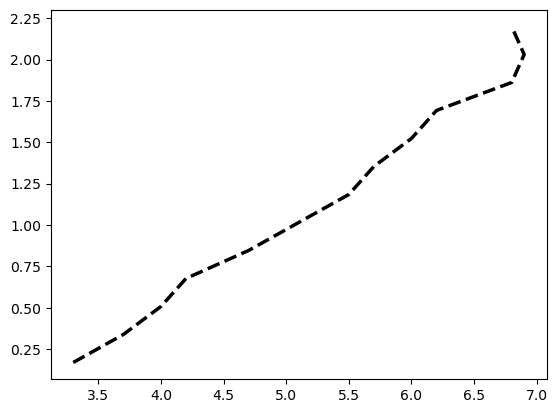

In [55]:
plt.plot((peak2-150)/10, np.linspace(0,2.2,len(peak2)), ls='--', lw=2.5, color='black')

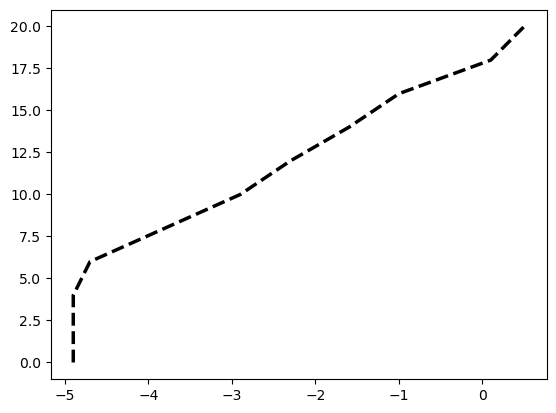

In [42]:
plt.plot((peak1-150)/10, range(0,len(peak1)*2,2), ls='--', lw=2.5, color='black')

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4])

In [45]:
range(0,len(peak1)*2,2)

range(0, 22, 2)

In [28]:
len(peak1)

11

In [30]:
range(0,len(peak1),1)

range(0, 11)

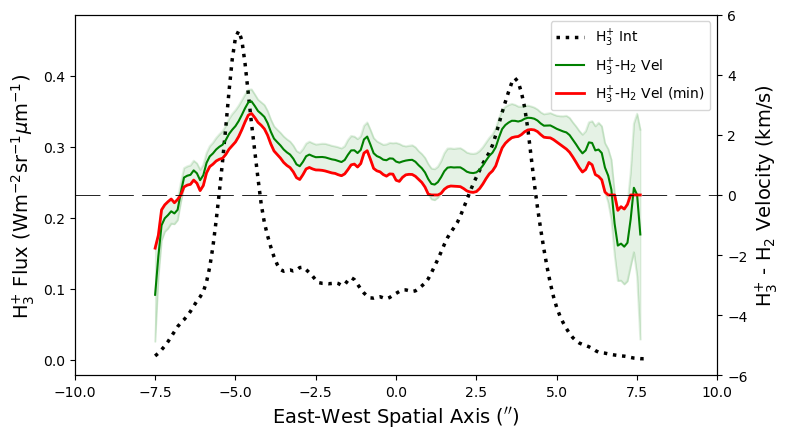

In [10]:
c2 = b2 - a2
errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

c3 = c2 + 0
c_min = c2 - errc2
c_max = c2 + errc2
c_max_t = c3/c_max
c_min_t = c3/c_min
c_max_t[c_max_t <0] = 0
c_min_t[c_min_t <0] = 0
m3 = c_max_t * c_min_t

m3[m3 > 0] = 1

d3 = c3 * m3
d3a = c_min * m3
d3b = c_max * m3

e3 = c3 *0
e3[d3 > 0] = c_min[d3 > 0]
e3[d3 < 0] = c_max[d3 < 0]

# for i in range(len(h3p_vprf)):
for i in range(18,19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-15,15,301)
#         int2 = (h3p_int/np.nanmax(h3p_int[i])*7.9-3.95)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
#         fig, ax = plt.subplots(figsize = (12, 4))
        fig, ax = plt.subplots(figsize = (8, 4.5))
#         plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vcur = c2[i]
        vcurmax = c2[i] + errc2[i]
        vcurmin = c2[i] - errc2[i]
        
        ax2 = ax.twinx()
        
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$ Int', lw=2.5)
#         ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        
        ax2.plot(xnew, vcur, color='green', label='H$_3^{+}$-H$_2$ Vel')        
        ax2.plot(xnew, vcurmax, color='green', alpha=0.1)
        ax2.plot(xnew, vcurmin, color='green', alpha=0.1)
        ax2.fill_between(xnew, vcurmin, vcurmax, color='green', alpha=0.1)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='palesalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='paleblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c3[i], yerr=errc2[i], color='green', ecolor='palegreen', label='H$_3^{+}$-H$_2$')
        ax2.plot(xnew, e3[i], color='red', ls='-', label='H$_3^{+}$-H$_2$ Vel (min)', lw=2)
        
        # giving labels to the axises
        ax.set_xlabel('East-West Spatial Axis ($^{\prime\prime}$)', fontsize=14)
        ax.set_ylabel('H$_3^{+}$ Flux (Wm$^{-2}$sr$^{-1}$$\mu$m$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('H$_3^{+}$ - H$_2$ Velocity (km/s)', fontsize=14)
        plt.axhline(y=0, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#         plt.xlim(-150,150)
#         plt.ylim(-4,4)
        ax2.set_xlim(-10,10)
        ax2.set_ylim(-6,6)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=1)
        
        plt.tight_layout()
        plt.savefig(figs_dir+'/fig2b.pdf', dpi=600, bbox_inches='tight', facecolor='white')
#         plt.savefig(plots_dir+'/curr_fr'+str(i), dpi=400, bbox_inches='tight', facecolor='white')
#         plt.savefig(plots_dir+'/curr_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


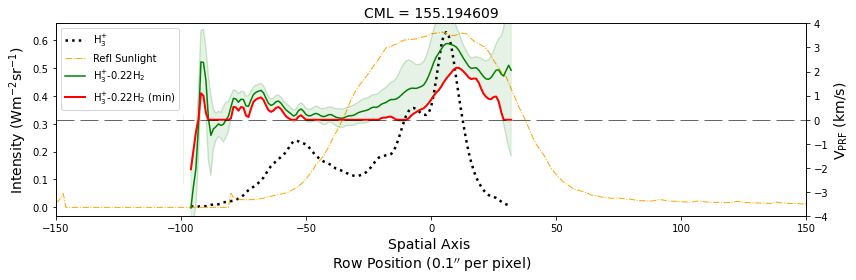

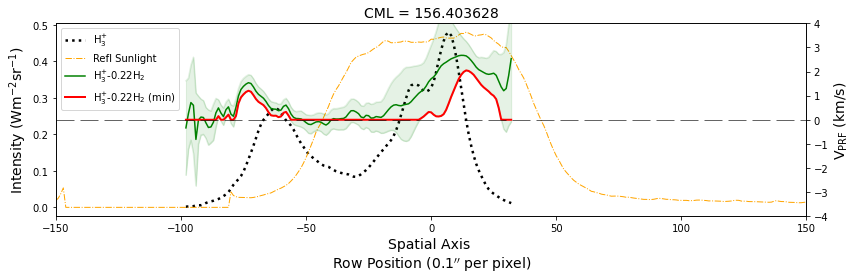

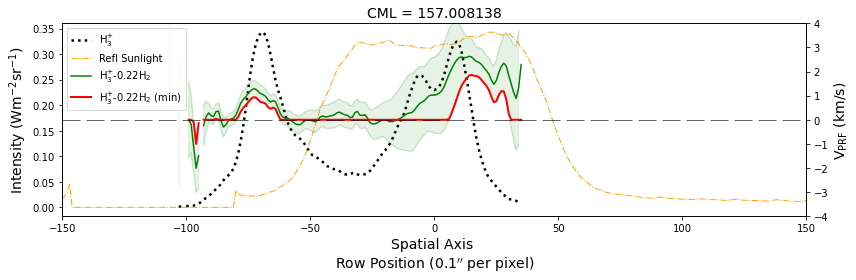

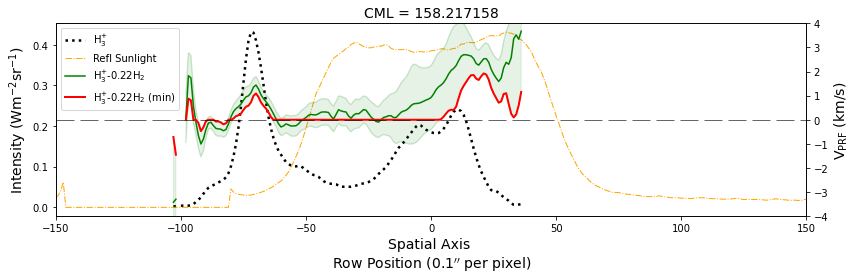

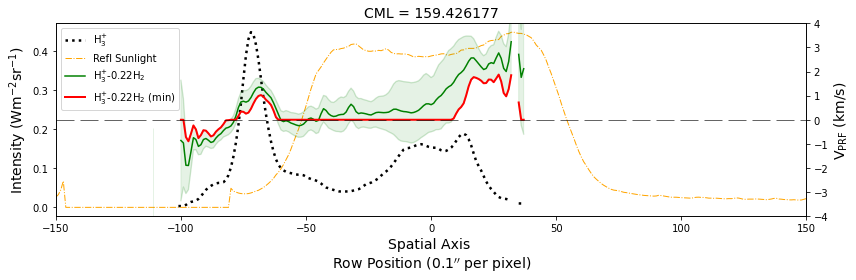

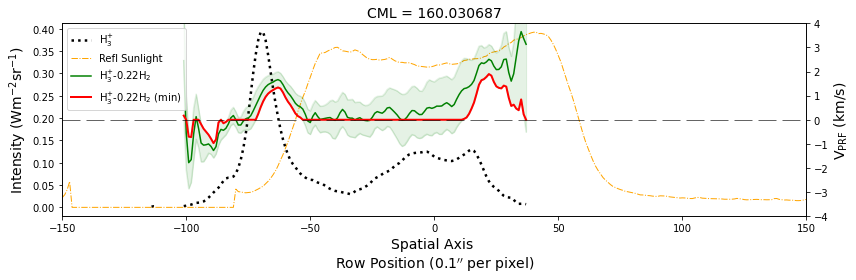

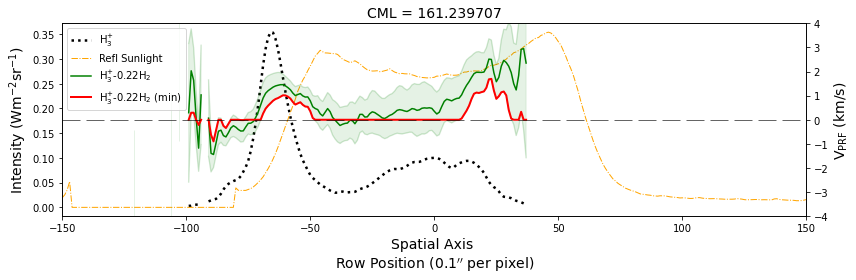

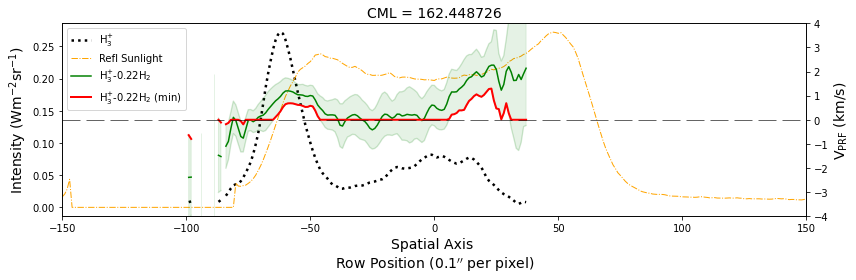

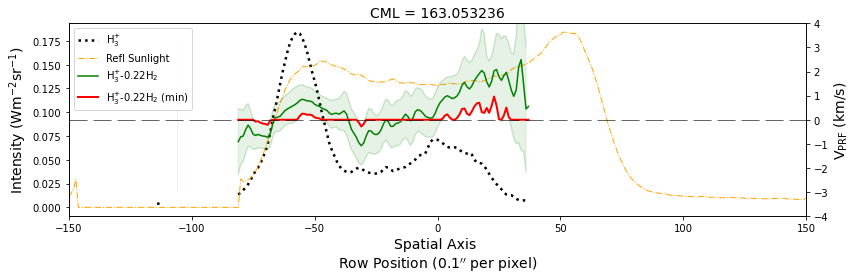

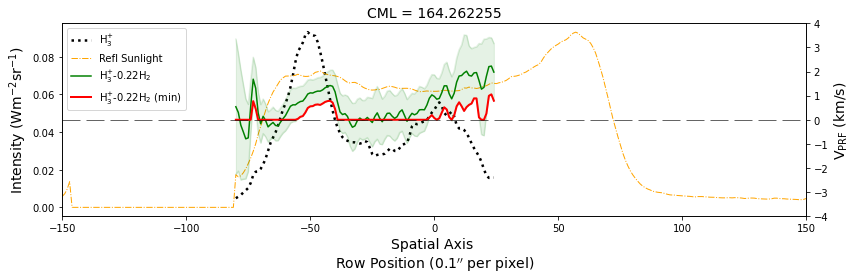

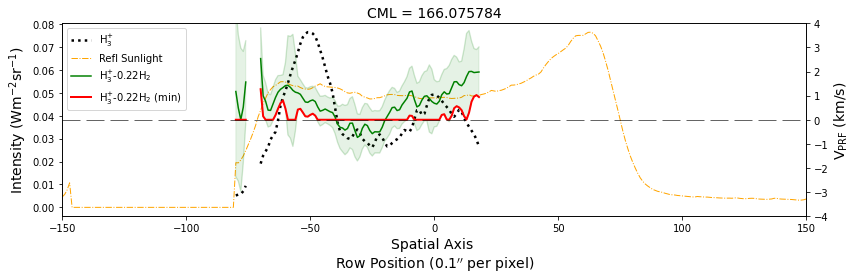

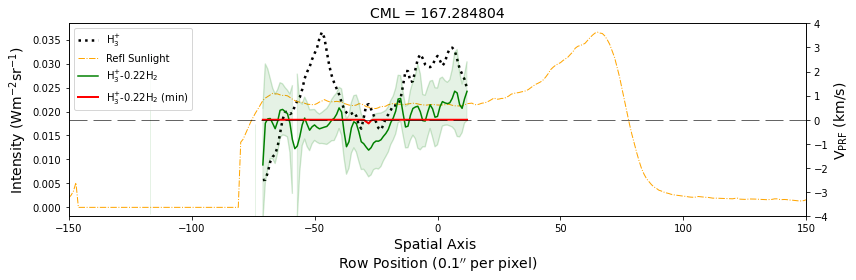

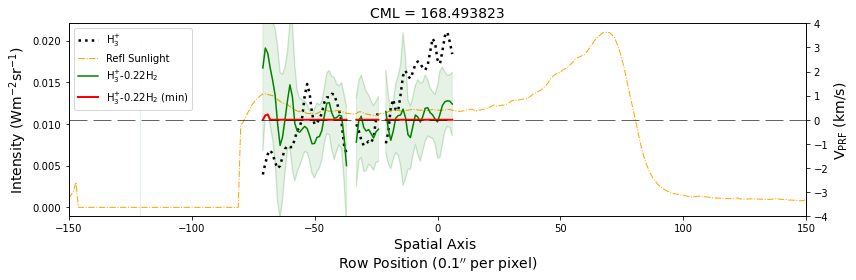

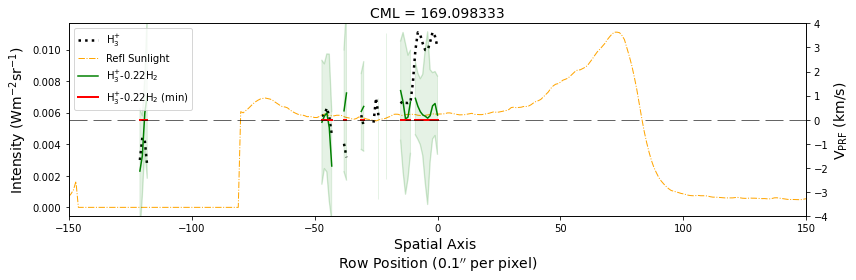

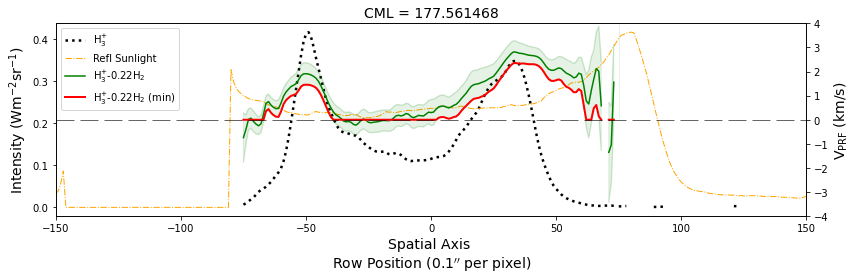

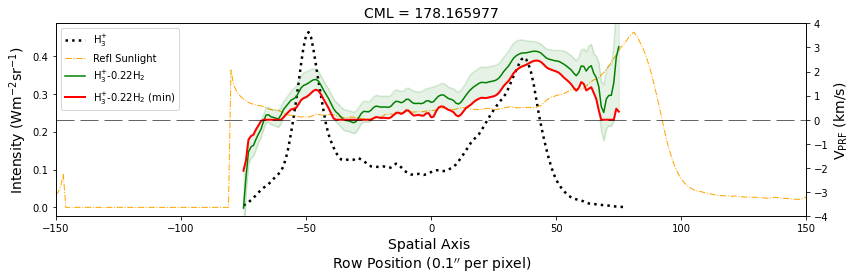

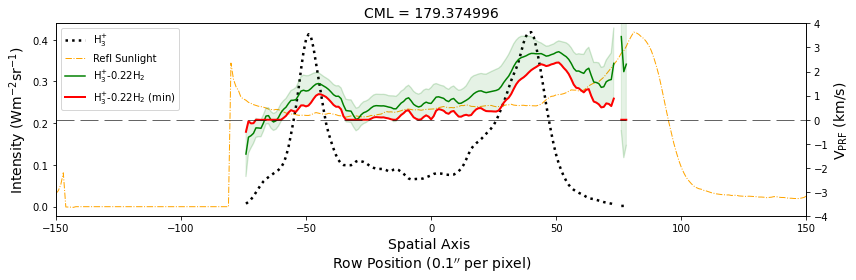

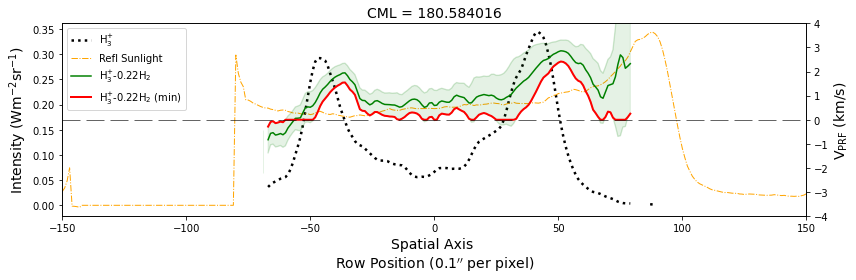

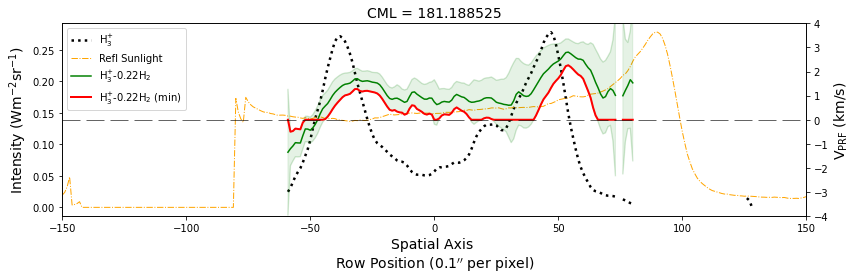

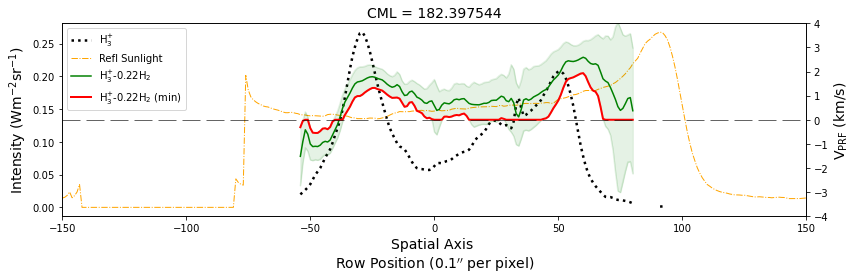

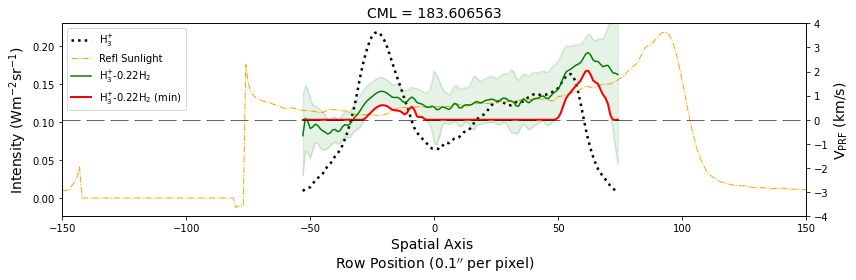

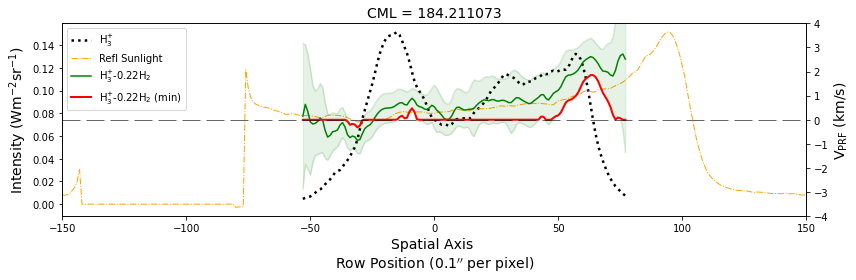

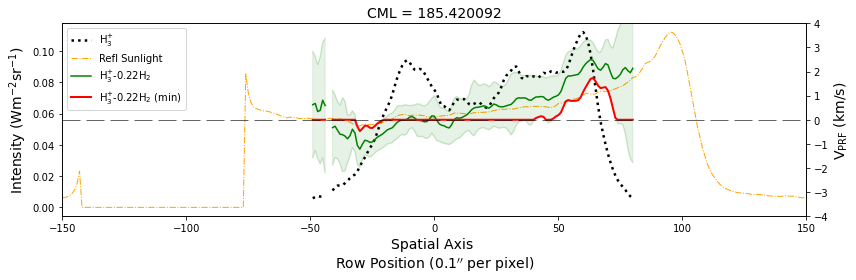

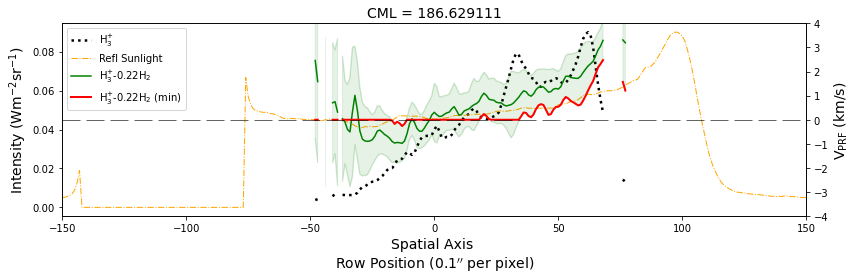

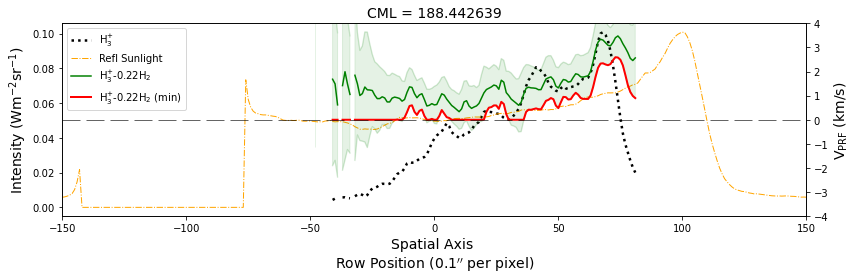

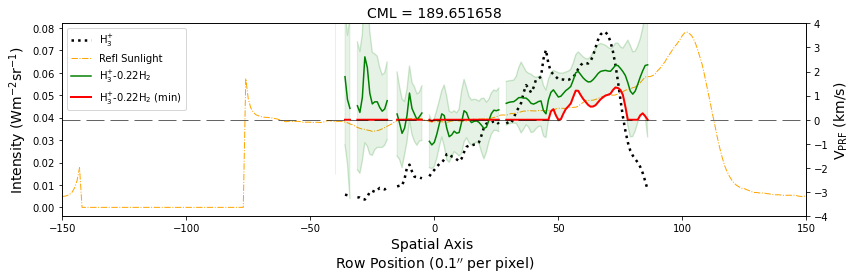

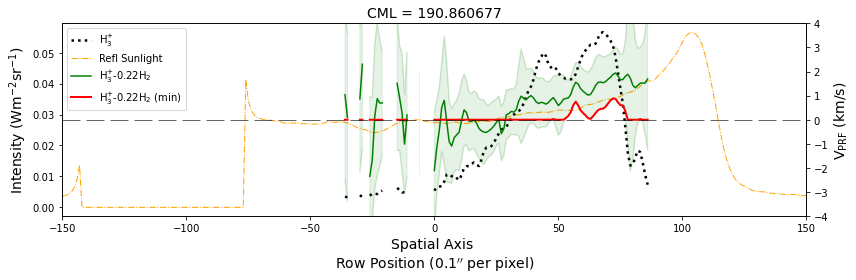

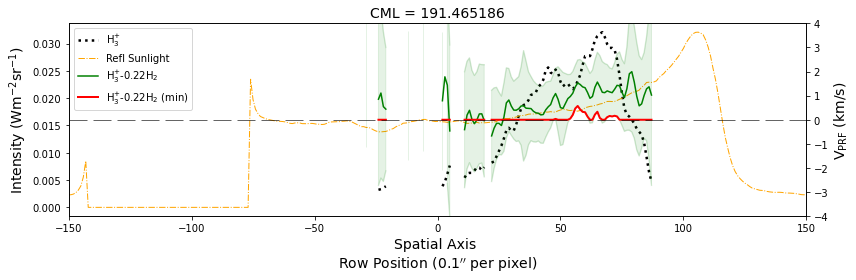

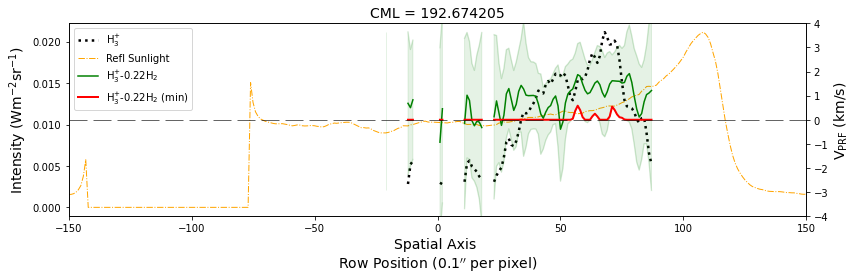

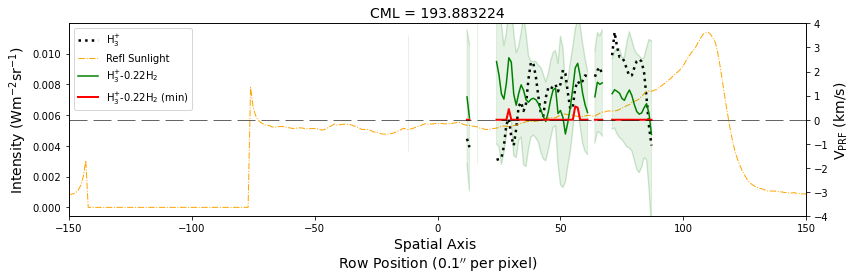

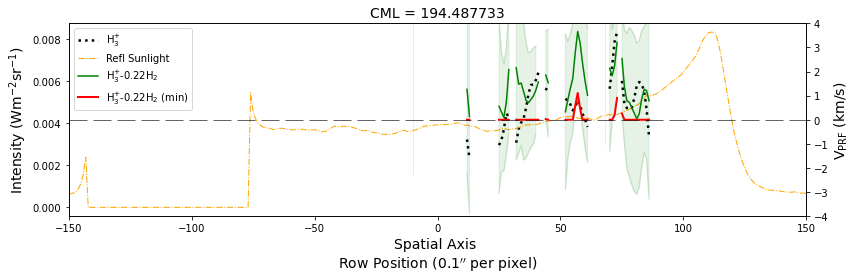

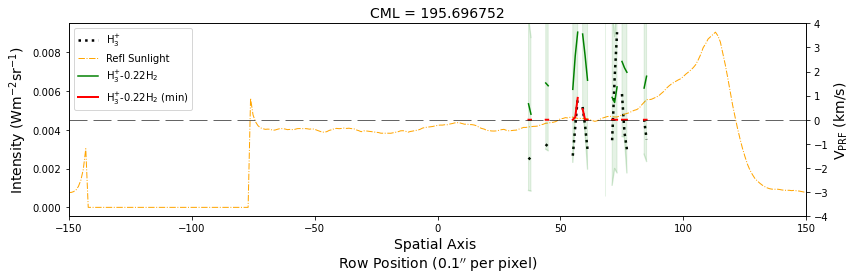

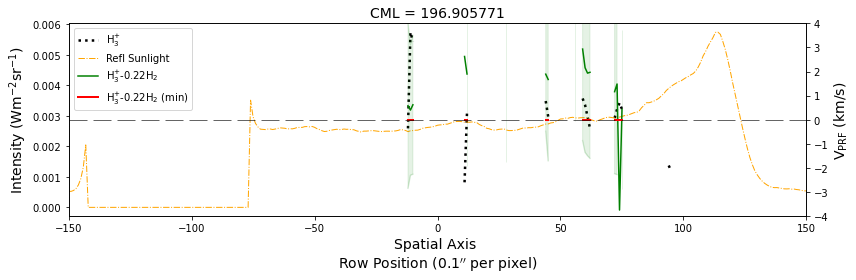

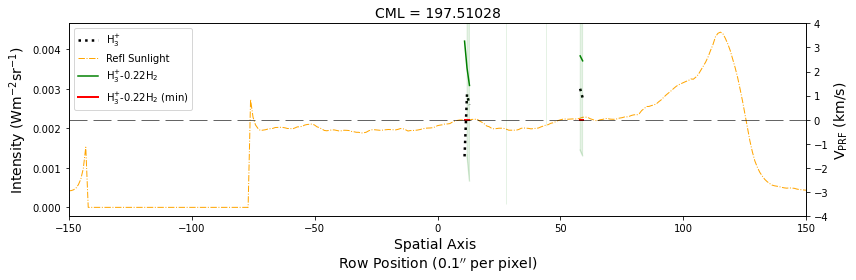

In [10]:
c2 = b2 - a2*0.22
errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

c3 = c2 + 0
c_min = c2 - errc2
c_max = c2 + errc2
c_max_t = c3/c_max
c_min_t = c3/c_min
c_max_t[c_max_t <0] = 0
c_min_t[c_min_t <0] = 0
m3 = c_max_t * c_min_t

m3[m3 > 0] = 1

d3 = c3 * m3
d3a = c_min * m3
d3b = c_max * m3

e3 = c3 *0
e3[d3 > 0] = c_min[d3 > 0]
e3[d3 < 0] = c_max[d3 < 0]

for i in range(len(h3p_vprf)):
# for i in range(18,19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-150,150,301)
#         int2 = (h3p_int/np.nanmax(h3p_int[i])*7.9-3.95)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vcur = c2[i]
        vcurmax = c2[i] + errc2[i]
        vcurmin = c2[i] - errc2[i]
        
        ax2 = ax.twinx()
        
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        
        ax2.plot(xnew, vcur, color='green', label='H$_3^{+}$-0.22H$_2$')        
        ax2.plot(xnew, vcurmax, color='green', alpha=0.1)
        ax2.plot(xnew, vcurmin, color='green', alpha=0.1)
        ax2.fill_between(xnew, vcurmin, vcurmax, color='green', alpha=0.1)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='palesalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='paleblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c3[i], yerr=errc2[i], color='green', ecolor='palegreen', label='H$_3^{+}$-H$_2$')
        ax2.plot(xnew, e3[i], color='red', ls='-', label='H$_3^{+}$-0.22H$_2$ (min)', lw=2)
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        plt.axhline(y=0, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(-150,150)
        plt.ylim(-4,4)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=2)
        
        plt.tight_layout()
#         plt.savefig(plots_dir+'/h2_h3p_curr_fr'+str(i), dpi=400, bbox_inches='tight', facecolor='white')
        plt.savefig(plots_dir+'/curr_0.22h2_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


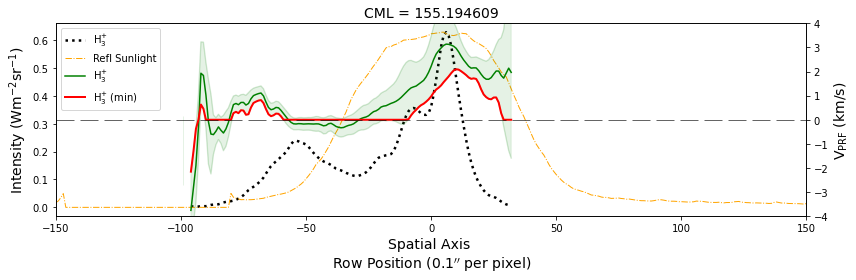

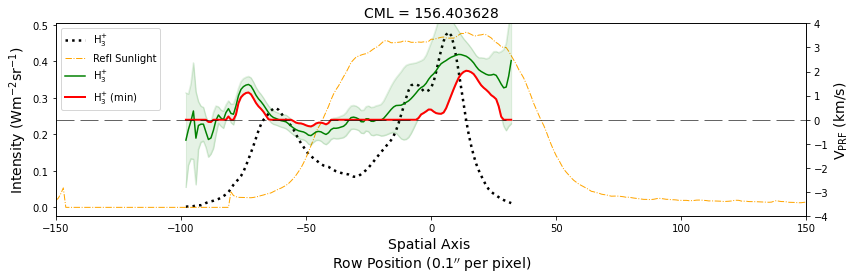

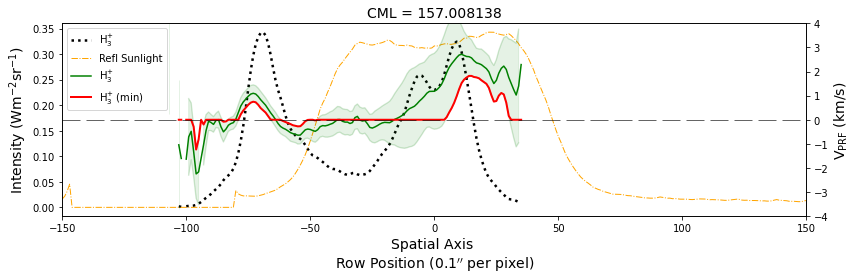

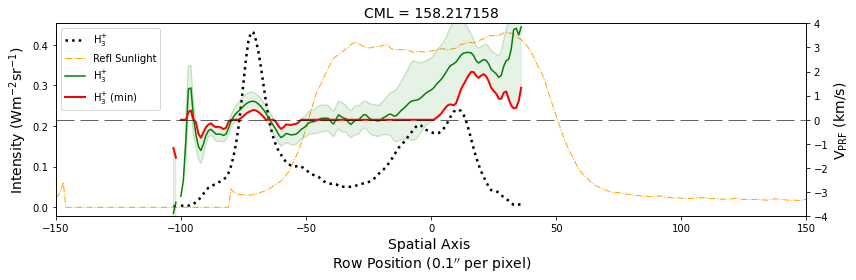

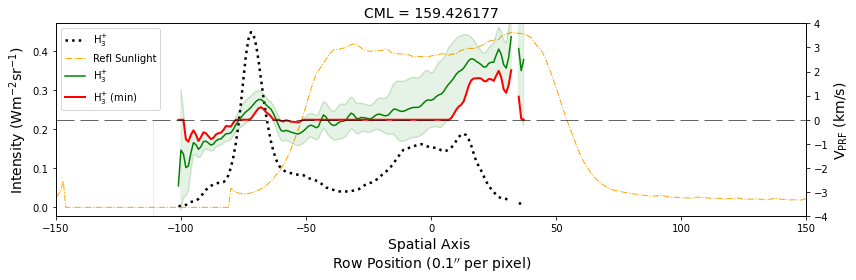

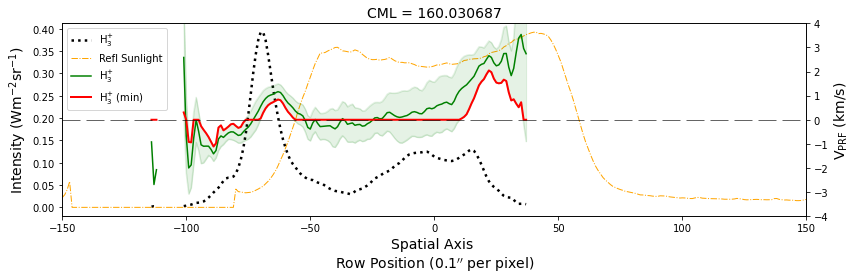

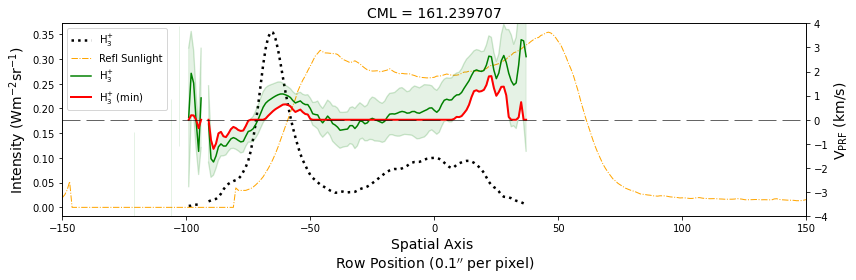

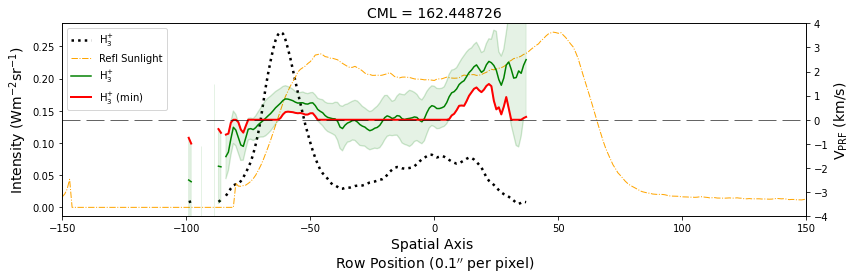

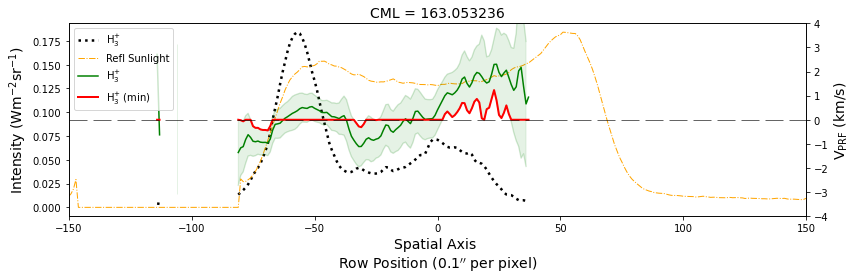

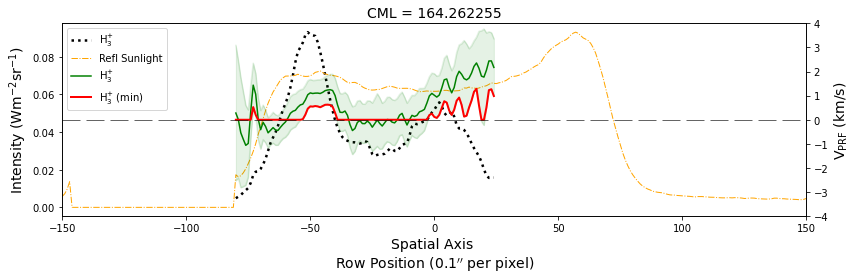

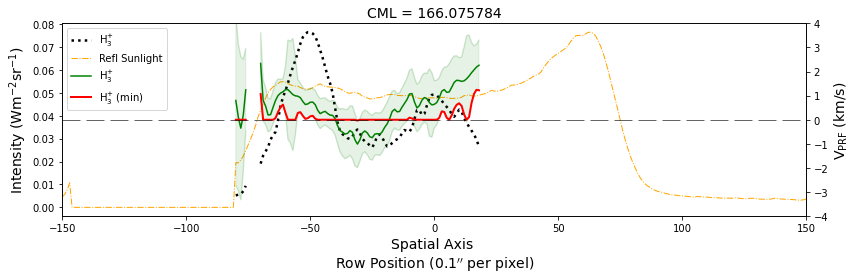

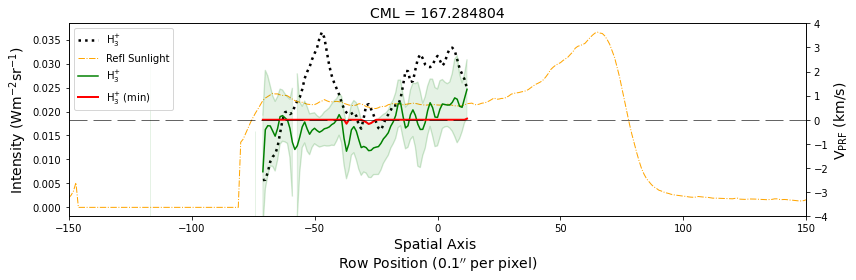

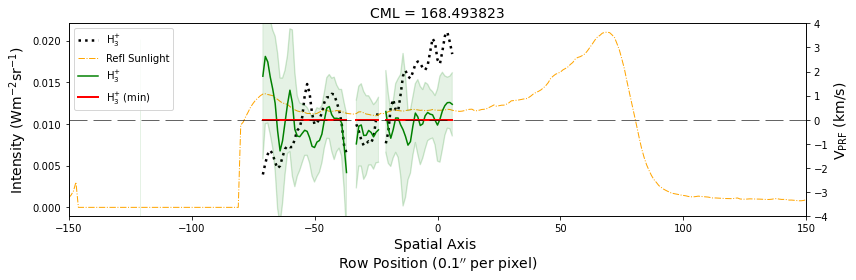

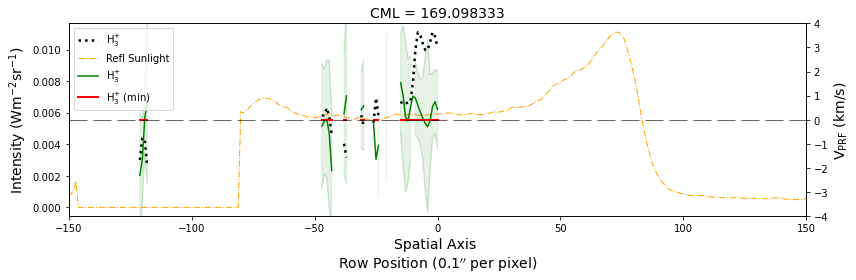

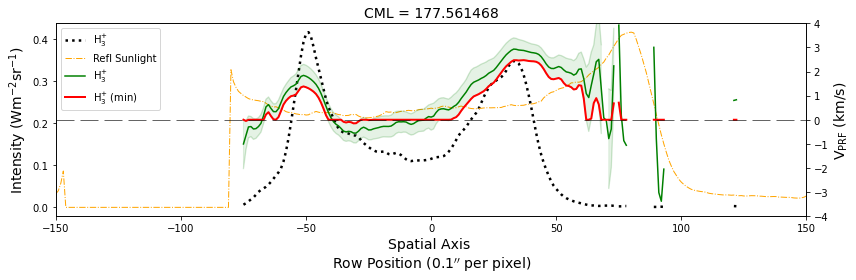

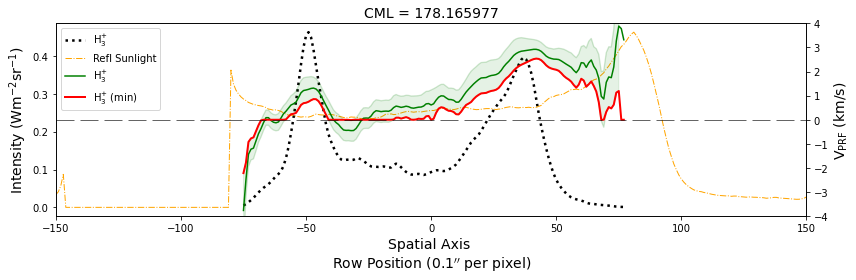

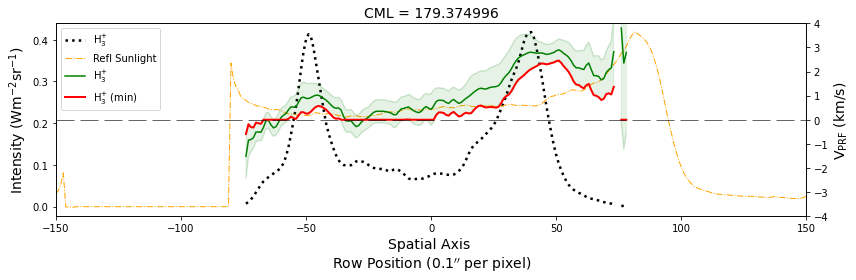

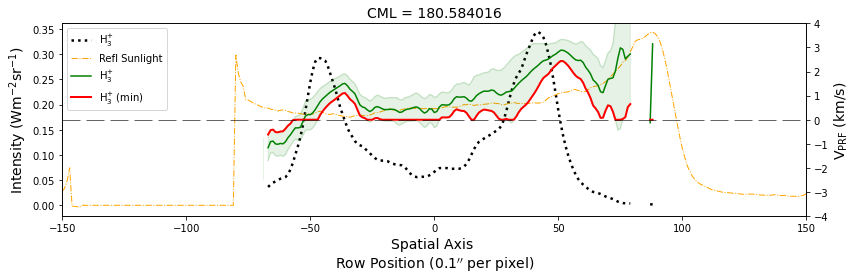

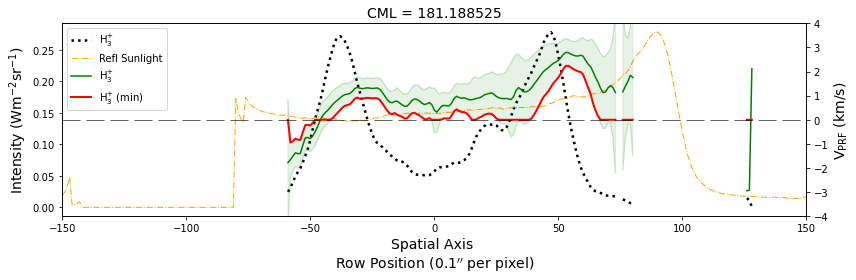

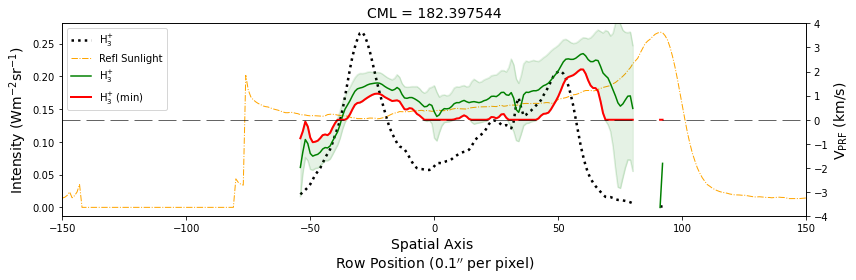

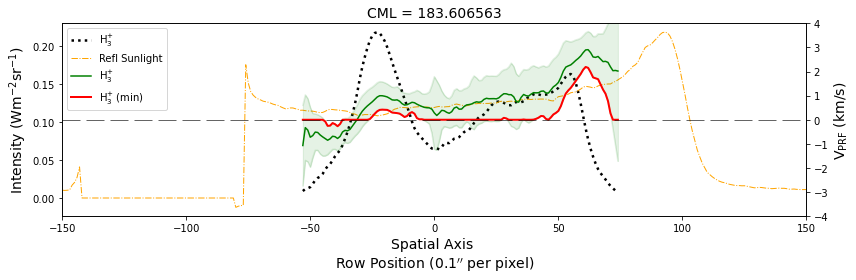

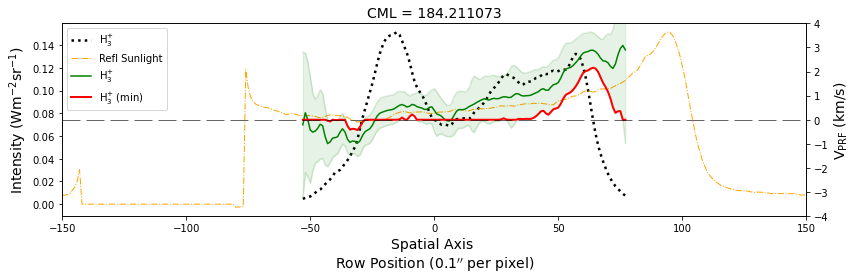

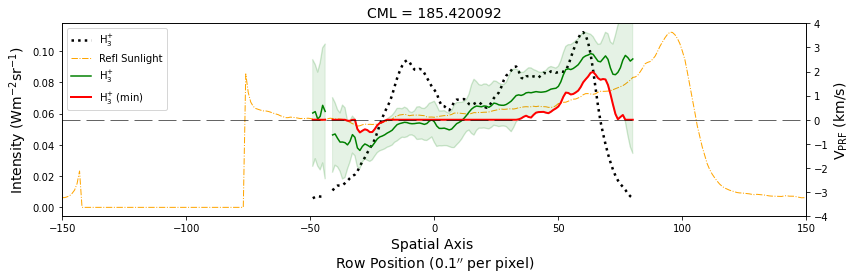

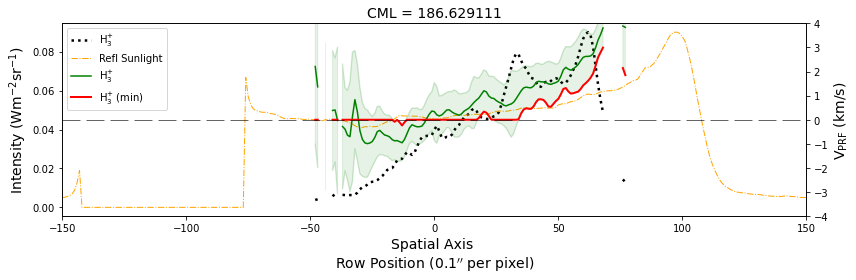

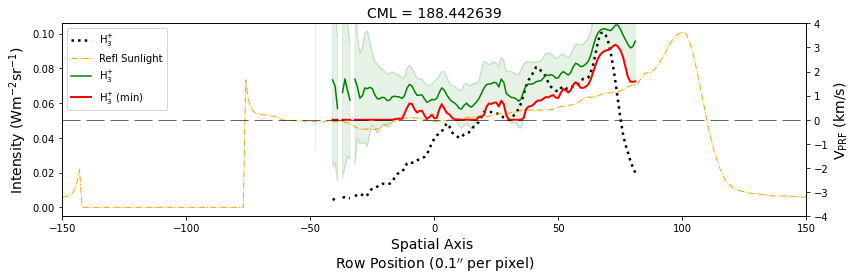

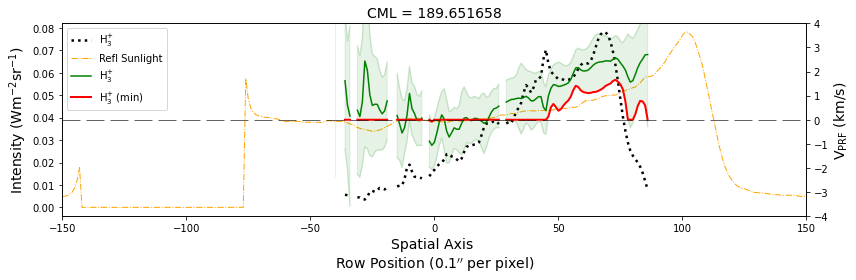

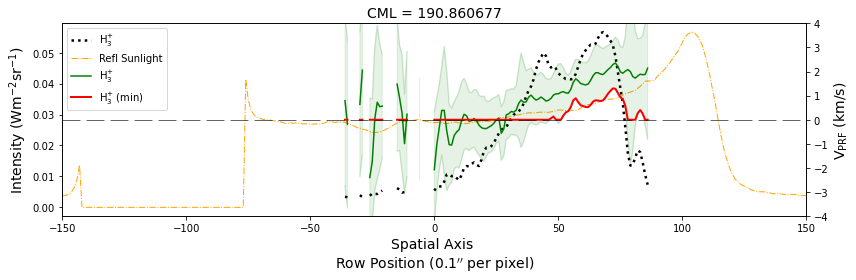

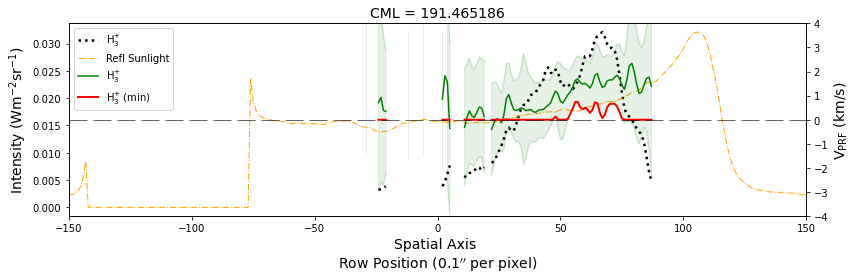

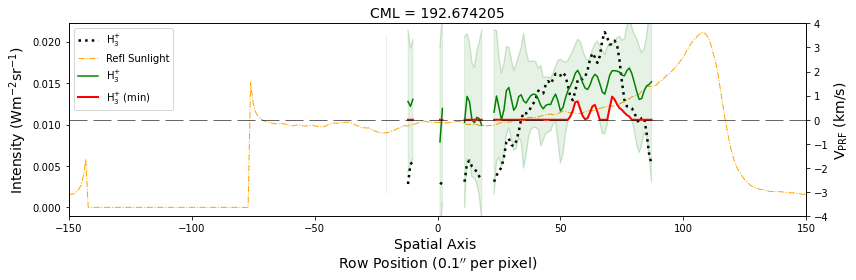

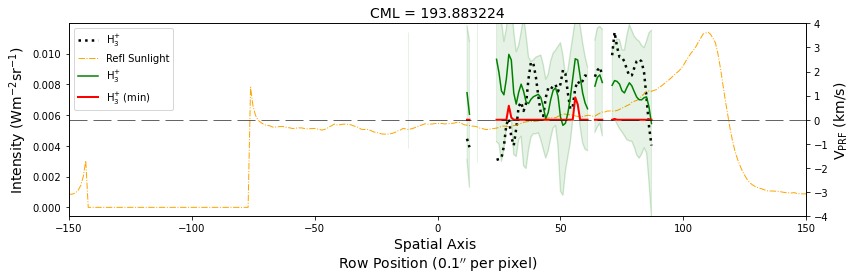

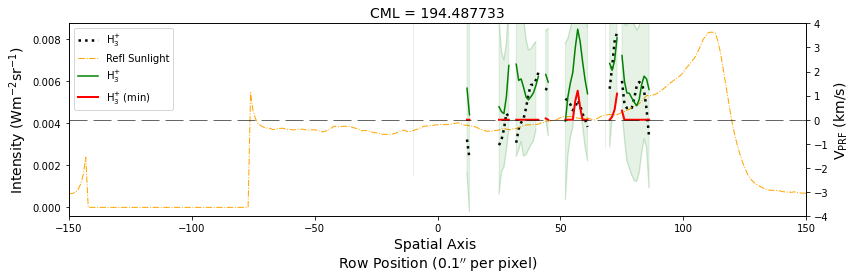

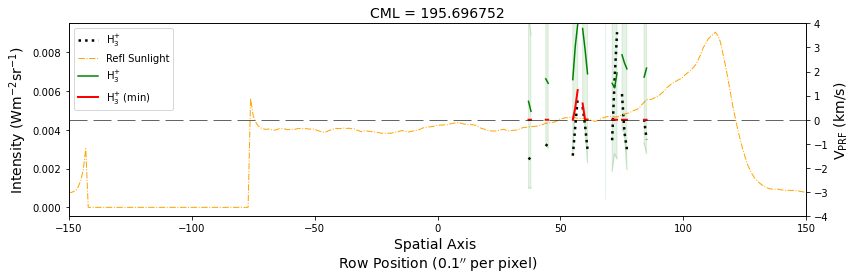

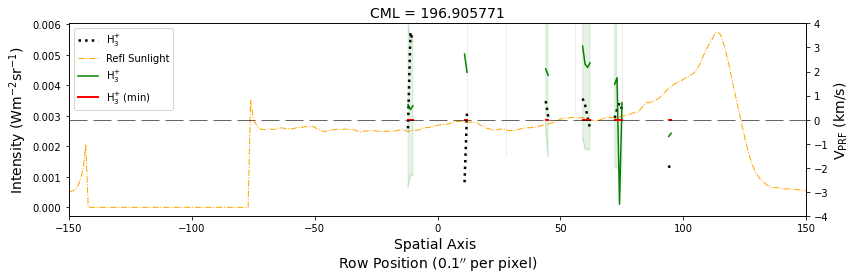

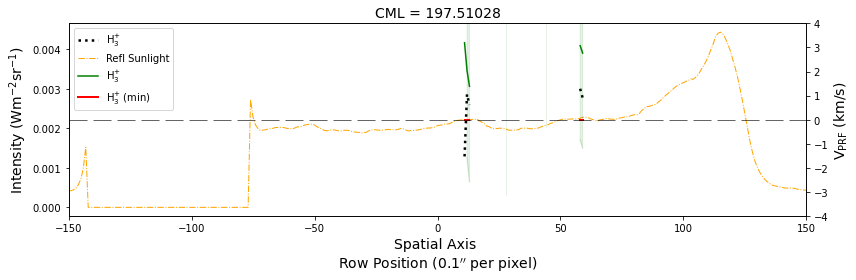

In [11]:
c2 = b2 - a2
errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

c3 = b2 + 0
c_min = b2 - errc2
c_max = b2 + errc2
c_max_t = c3/c_max
c_min_t = c3/c_min
c_max_t[c_max_t <0] = 0
c_min_t[c_min_t <0] = 0
m3 = c_max_t * c_min_t

m3[m3 > 0] = 1

d3 = c3 * m3
d3a = c_min * m3
d3b = c_max * m3

e3 = c3 *0
e3[d3 > 0] = c_min[d3 > 0]
e3[d3 < 0] = c_max[d3 < 0]

for i in range(len(h3p_vprf)):
# for i in range(18,19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-150,150,301)
#         int2 = (h3p_int/np.nanmax(h3p_int[i])*7.9-3.95)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vh2 = a2[i]
        vh2max = a2[i] + h2_verr[i]
        vh2min = a2[i] - h2_verr[i]
        
        vh3p = b2[i]
        vh3pmax = b2[i] + h3p_verr[i]
        vh3pmin = b2[i] - h3p_verr[i]
        
        vcur = c2[i]
        vcurmax = b2[i] + errc2[i]
        vcurmin = b2[i] - errc2[i]
        
        ax2 = ax.twinx()
        
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        
        ax2.plot(xnew, vh3p, color='green', label='H$_3^{+}$')
#         ax2.plot(xnew, vcur, color='green' )        
        ax2.plot(xnew, vcurmax, color='green', alpha=0.1)
        ax2.plot(xnew, vcurmin, color='green', alpha=0.1)
        ax2.fill_between(xnew, vcurmin, vcurmax, color='green', alpha=0.1)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='palesalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='paleblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c3[i], yerr=errc2[i], color='green', ecolor='palegreen', label='H$_3^{+}$-H$_2$')
        ax2.plot(xnew, e3[i], color='red', ls='-', label='H$_3^{+}$ (min)', lw=2)
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        plt.axhline(y=0, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(-150,150)
        plt.ylim(-4,4)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=2)
        
        plt.tight_layout()
        plt.savefig(plots_dir+'/curr_h3p_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')
#         plt.savefig(plots_dir+'/h2_h3p_curr_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

NameError: name 'h3p_vprf2' is not defined

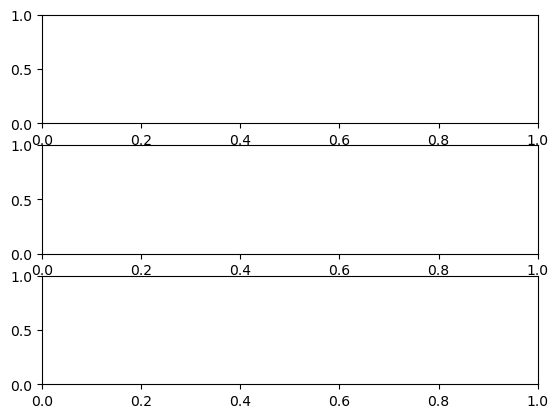

In [6]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)

ticks = np.linspace(0,300,7)
ticklabels = ["{:.0f}".format(i) for i in (ticks-150)/10]

ax1.imshow(h3p_vprf2, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r', 
#            extent=[-150, 150, 146.0669, 189.0669], 
#            extent=[-150,150,44,0],
           vmin=-4, 
           vmax=4)
ax2.imshow(h3p_vprf2, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r', 
#            extent=[-150, 150, 146.0669, 189.0669], 
#            extent=[-150,150,44,0],
           vmin=-4, 
           vmax=4)
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticklabels)
# ax1.set_xlim(50,250)
# ax2.set_xlim(50,250)

In [ ]:
t

In [75]:
ticks = np.linspace(0,300,7)
ticklabels = ["{:.0f}".format(i) for i in (ticks-150)/10]
ticks, ticklabels

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 ['-15', '-10', '-5', '0', '5', '10', '15'])

In [72]:
ticks = np.linspace(0,300,16)
ticks

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300.])

(array([-11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,
          0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.]),
 [' -2.20',
  ' -2.00',
  ' -1.80',
  ' -1.60',
  ' -1.40',
  ' -1.20',
  ' -1.00',
  ' -0.80',
  ' -0.60',
  ' -0.40',
  ' -0.20',
  '  0.00',
  '  0.20',
  '  0.40',
  '  0.60',
  '  0.80',
  '  1.00',
  '  1.20',
  '  1.40',
  '  1.60',
  '  1.80',
  '  2.00',
  '  2.20'])

In [11]:
ticks = np.linspace(0,20,5)
# What those pixel locations correspond to in data coordinates.
# Also set the float format here
ticklabels = ["{:6.2f}".format(i) for i in np.exp(ticks/5)]
ticklabels

['  1.00', '  2.72', '  7.39', ' 20.09', ' 54.60']

(-100.0, 100.0)

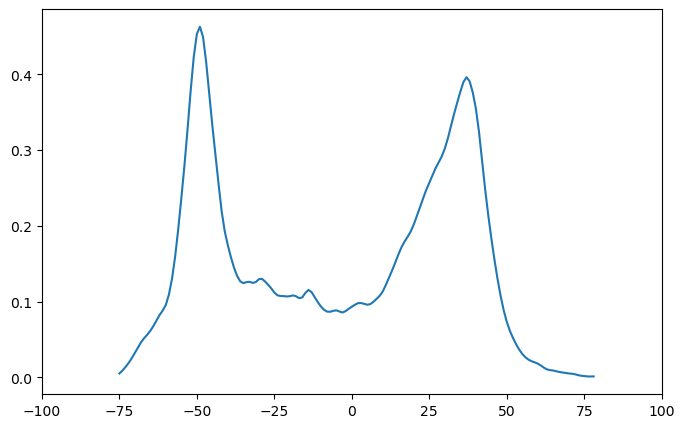

In [173]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(-150,150,301),h3p_int_rs[5])
plt.xlim(-100,100)
# plt.plot(np.linspace(-100,100,201),np.ones(201)*2, color='black', ls='dashed', dashes=(5, 5), lw=2)

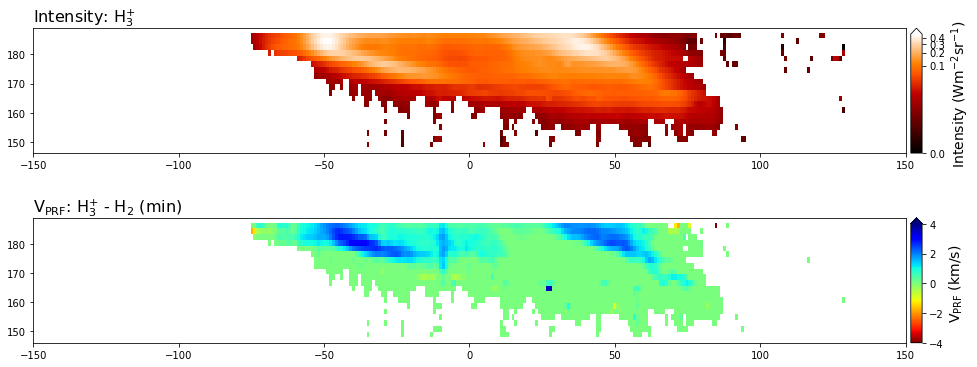

In [12]:
h3p_int2 = np.delete(h3p_int, np.s_[:16], axis=0)
h3p_vprf2 = np.delete(b2, np.s_[:16], axis=0)
h2_int2 = np.delete(h2_int, np.s_[:16], axis=0)
h2_vprf2 = np.delete(a2, np.s_[:16], axis=0)
curr2 = np.delete(c3, np.s_[:16], axis=0)
curr_min2 = np.delete(e3, np.s_[:16], axis=0)

h3p_int_rs = np.array(Image.fromarray(h3p_int2).resize(size=(301, 44), resample=0))
h3p_vprf_rs = np.array(Image.fromarray(h3p_vprf2).resize(size=(301, 44), resample=0))
h2_int_rs = np.array(Image.fromarray(h2_int2).resize(size=(301, 44), resample=0))
h2_vprf_rs = np.array(Image.fromarray(h2_vprf2).resize(size=(301, 44), resample=0))
curr_rs = np.array(Image.fromarray(curr2).resize(size=(301, 44), resample=0))
curr_min_rs = np.array(Image.fromarray(curr_min2).resize(size=(301, 44), resample=0))

fig = plt.figure(figsize=(15,8), tight_layout=True, facecolor='white')

fig.add_subplot(311)
plt.imshow(h3p_int_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
           extent=[-150, 150, 146.0669, 189.0669], 
           norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
plt.title('Intensity: H$_3^{+}$', loc='left', fontsize=16)
plt.colorbar(extend='max', aspect=11, pad=0.005, shrink=0.75).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

# plt.contour(lat, np.linspace(-90, 90, 19), colors='blue', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
# plt.contour(long, np.linspace(0,360,25), colors='cyan', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
# plt.contour(long, np.linspace(0,360,5), colors='blue', origin='upper', extent=[-150, 150, 145.0669, 189.0669])

# fig.add_subplot(312)
# plt.imshow(curr_rs, 
#            aspect='equal', 
#            interpolation='none', 
#            cmap='jet_r', 
#            extent=[-150, 150, 146.0669, 189.0669], 
#            vmin=-4, 
#            vmax=4)
# # # plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# # # plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
# # # plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# # plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# # # plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=16)
# plt.title('d) V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(312)
plt.imshow(curr_min_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r',
           extent=[-150, 150, 146.0669, 189.0669],
           vmin=-4, 
           vmax=4)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
plt.title('V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=16)
plt.colorbar(extend='max', aspect=11, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

# fig.supxlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# fig.supylabel('Frame Number', fontsize=14)
# plt.savefig(plots_dir+'/curr_min_map.pdf', dpi=400, bbox_inches='tight', facecolor='white')

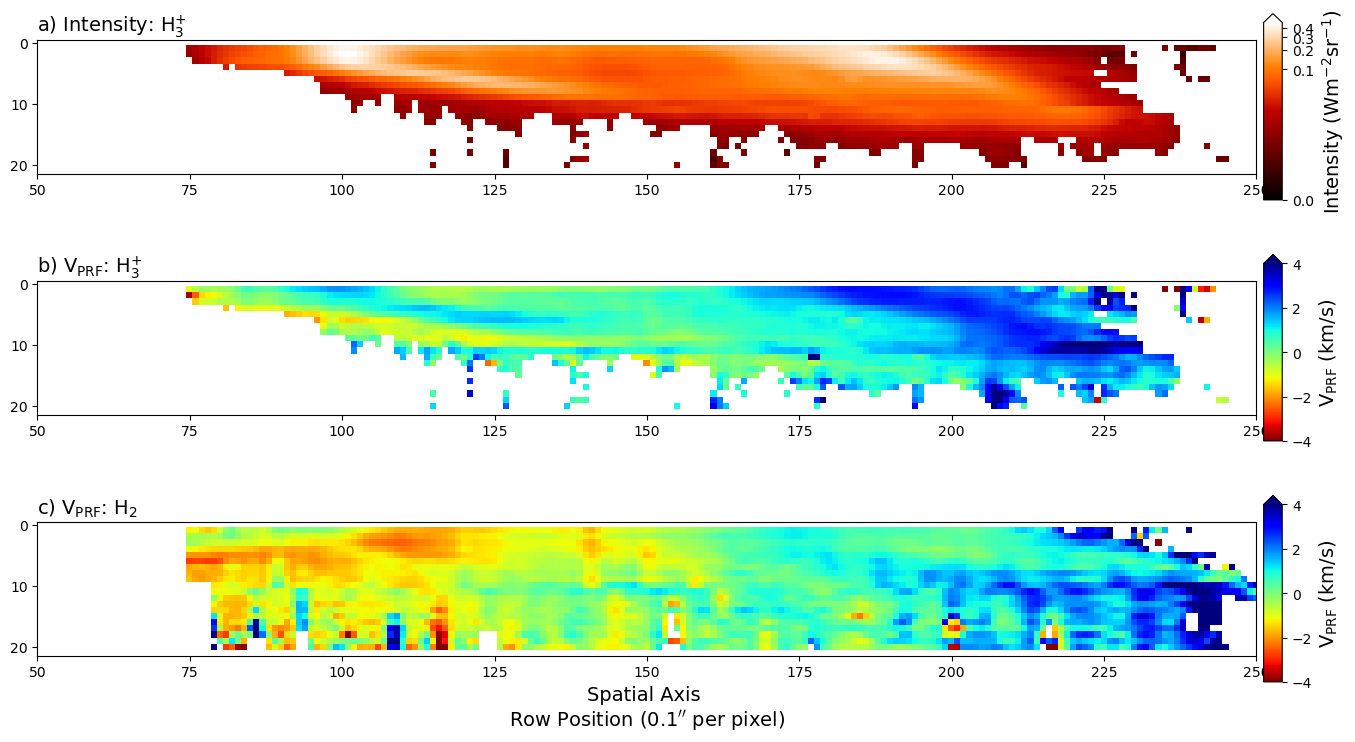

In [83]:
fig = plt.figure(figsize=(15,8), tight_layout=True, facecolor='white')

fig.add_subplot(311)
plt.imshow(h3p_int2, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
#            extent=[-150, 150, 146.0669, 189.0669], 
           norm=colors.PowerNorm(gamma=0.2))
plt.xlim(50,250)
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.title('a) Intensity: H$_3^{+}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

fig.add_subplot(312)
plt.imshow(h3p_vprf2, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r', 
#            extent=[-150, 150, 146.0669, 189.0669], 
           vmin=-4, 
           vmax=4)
plt.xlim(50,250)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=16)
plt.title('b) V$_{\mathrm{PRF}}$: H$_3^{+}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h2_vprf2, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r',
#            extent=[-150, 150, 146.0669, 189.0669],
           vmin=-4, 
           vmax=4)
plt.xlim(50,250)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.title('c) V$_{\mathrm{PRF}}$: H$_2$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

# fig.supxlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# fig.supylabel('Frame Number', fontsize=14)
# plt.savefig(plots_dir+'/h2_h3p_int_vel_map.pdf', dpi=400, bbox_inches='tight', facecolor='white')

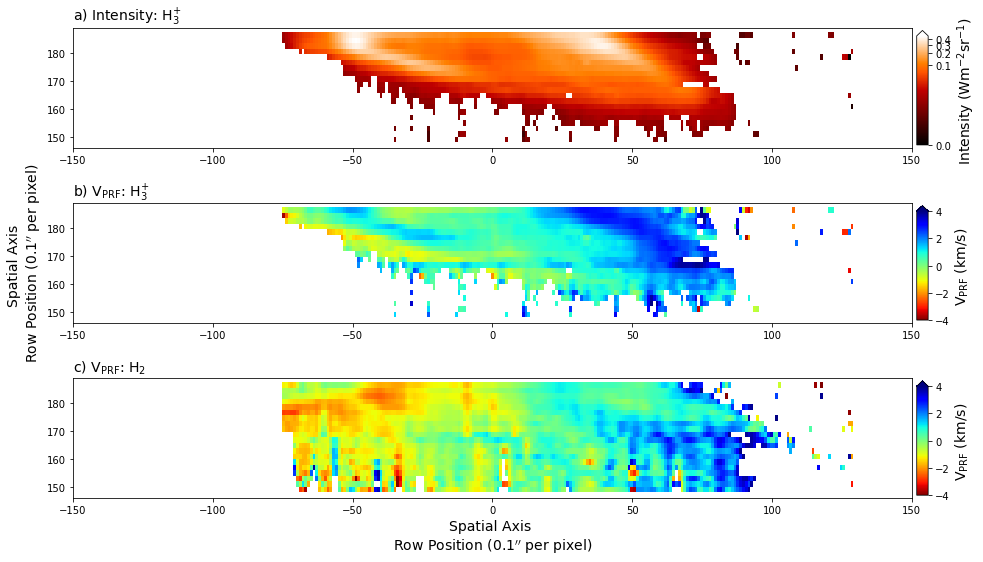

In [20]:
fig = plt.figure(figsize=(15,8), tight_layout=True, facecolor='white')

fig.add_subplot(311)
plt.imshow(h3p_int_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
           extent=[-150, 150, 146.0669, 189.0669], 
           norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.title('a) Intensity: H$_3^{+}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

fig.add_subplot(312)
plt.imshow(h3p_vprf_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r', 
           extent=[-150, 150, 146.0669, 189.0669], 
           vmin=-4, 
           vmax=4)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=16)
plt.title('b) V$_{\mathrm{PRF}}$: H$_3^{+}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h2_vprf_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r',
           extent=[-150, 150, 146.0669, 189.0669],
           vmin=-4, 
           vmax=4)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.title('c) V$_{\mathrm{PRF}}$: H$_2$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=10, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

# fig.supxlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# fig.supylabel('Frame Number', fontsize=14)
# plt.savefig(plots_dir+'/h2_h3p_int_vel_map.pdf', dpi=400, bbox_inches='tight', facecolor='white')

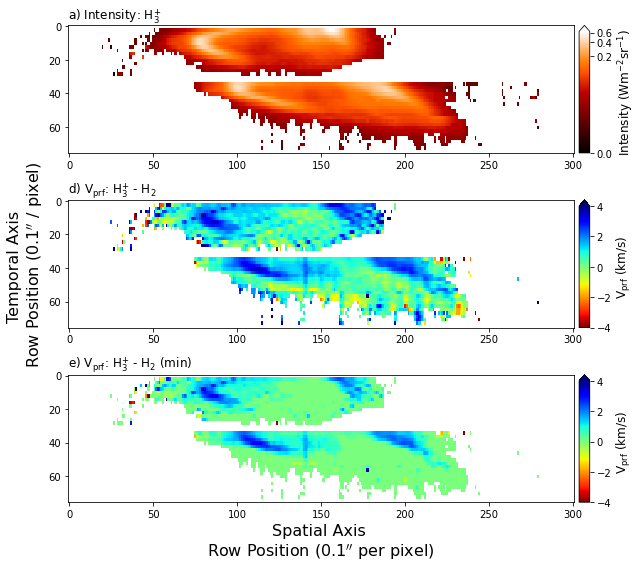

In [10]:
h3p_int_rs = np.array(Image.fromarray(h3p_int).resize(size=(301, 76), resample=0))
h3p_vprf_rs = np.array(Image.fromarray(b2).resize(size=(301, 76), resample=0))
h2_vprf_rs = np.array(Image.fromarray(a2).resize(size=(301, 76), resample=0))
curr_rs = np.array(Image.fromarray(c3).resize(size=(301, 76), resample=0))
curr_min_rs = np.array(Image.fromarray(e3).resize(size=(301, 76), resample=0))

fig = plt.figure(figsize=(15,8), tight_layout=True, facecolor='white')

fig.add_subplot(311)
plt.imshow(h3p_int_rs, aspect='equal', interpolation='none', cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# plt.ylabel('Frame Number', fontsize=12)
plt.title('a) Intensity: H$_3^{+}$', loc='left', fontsize=12)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=12)

# fig.add_subplot(312)
# plt.imshow(h3p_vprf_rs, aspect='equal', cmap='jet_r', vmin=-4, vmax=4)
# plt.plot(peak1, range(0, len(peak1)*2, 2), ls='--', lw=2, color='black')
# plt.plot(peak2, range(0, len(peak2)*2, 2), ls='--', lw=2, color='black')
# # plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# # plt.ylabel('Frame Number', fontsize=12)
# plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=16)
# plt.title('b) V$_{\mathrm{prf}}$: H$_3^{+}$', loc='left', fontsize=12)
# plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=12)

# fig.add_subplot(313)
# plt.imshow(h2_vprf_rs, aspect='equal', cmap='jet_r', vmin=-4, vmax=4)
# plt.plot(peak1, range(0, len(peak1)*2, 2), ls='--', lw=2, color='black')
# plt.plot(peak2, range(0, len(peak2)*2, 2), ls='--', lw=2, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=16)
# # plt.ylabel('Frame Number', fontsize=18)
# plt.title('c) V$_{\mathrm{prf}}$: H$_2$', loc='left', fontsize=12)
# plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=12)

fig.add_subplot(312)
plt.imshow(curr_rs, aspect='equal', interpolation='none', cmap='jet_r', vmin=-4, vmax=4)
# plt.plot(peak1, range(0, len(peak1)*2, 2), ls='--', lw=2, color='black')
# plt.plot(peak2, range(0, len(peak2)*2, 2), ls='--', lw=2, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# plt.ylabel('Frame Number', fontsize=12, alpha=0)
plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=16)
plt.title('d) V$_{\mathrm{prf}}$: H$_3^{+}$ - H$_2$', loc='left', fontsize=12)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=12)

fig.add_subplot(313)
plt.imshow(curr_min_rs, aspect='equal', interpolation='none', cmap='jet_r', vmin=-4, vmax=4)
# plt.plot(peak1, range(0, len(peak1)*2, 2), ls='--', lw=2, color='black')
# plt.plot(peak2, range(0, len(peak2)*2, 2), ls='--', lw=2, color='black')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=16)
# plt.ylabel('Frame Number', fontsize=10, alpha=0)
plt.title('e) V$_{\mathrm{prf}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=12)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=12)

# fig.supxlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# fig.supylabel('Frame Number', fontsize=12)
# plt.savefig(plots_dir+'/h2_h3p_curr_map.pdf', dpi=400, bbox_inches='tight', facecolor='white')

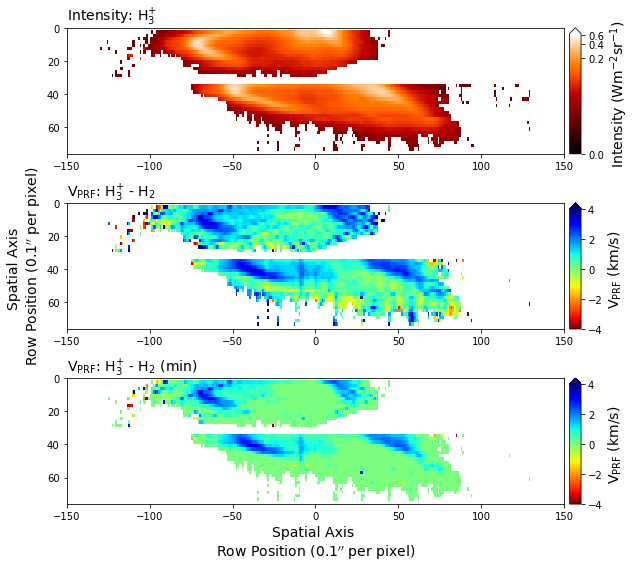

In [49]:
h3p_int_rs = np.array(Image.fromarray(h3p_int).resize(size=(301, 76), resample=0))
h3p_vprf_rs = np.array(Image.fromarray(b2).resize(size=(301, 76), resample=0))
h2_vprf_rs = np.array(Image.fromarray(a2).resize(size=(301, 76), resample=0))
curr_rs = np.array(Image.fromarray(c3).resize(size=(301, 76), resample=0))
curr_min_rs = np.array(Image.fromarray(e3).resize(size=(301, 76), resample=0))

fig = plt.figure(figsize=(15,8), tight_layout=True, facecolor='white')

fig.add_subplot(311)
plt.imshow(h3p_int_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
#            extent=[-150, 150, 146.0669, 189.0669], 
           extent=[-150, 150, 76, 0],
           norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
plt.title('Intensity: H$_3^{+}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=11, pad=0.005, shrink=1).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

# plt.contour(lat, np.linspace(-90, 90, 19), colors='blue', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
# plt.contour(long, np.linspace(0,360,25), colors='cyan', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
# plt.contour(long, np.linspace(0,360,5), colors='blue', origin='upper', extent=[-150, 150, 145.0669, 189.0669])

fig.add_subplot(312)
plt.imshow(curr_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r', 
#            extent=[-150, 150, 146.0669, 189.0669],
           extent=[-150, 150, 76, 0],
           vmin=-4, 
           vmax=4)
# # plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# # plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
# # plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# # plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=14)
plt.title('V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=11, pad=0.005, shrink=1).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(curr_min_rs, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r',
#            extent=[-150, 150, 146.0669, 189.0669],
           extent=[-150, 150, 76, 0],
           vmin=-4, 
           vmax=4)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
plt.title('V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=11, pad=0.005, shrink=1).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

# plt.savefig(plots_dir+'/curr_min_map', dpi=400, bbox_inches='tight', facecolor='white')
# plt.savefig(plots_dir+'/curr_min_map.pdf', dpi=400, bbox_inches='tight', facecolor='white')

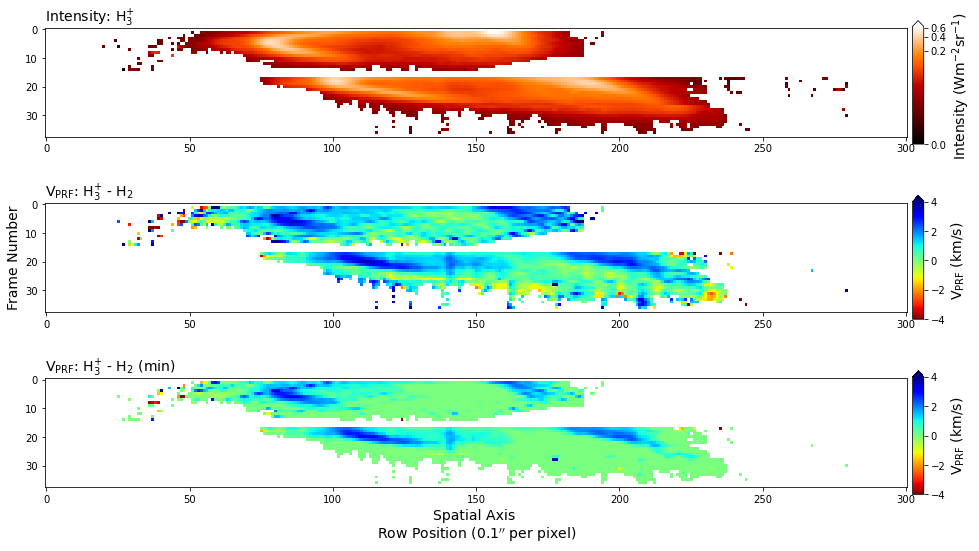

In [65]:
h3p_int_rs = np.array(Image.fromarray(h3p_int).resize(size=(301, 76), resample=0))
h3p_vprf_rs = np.array(Image.fromarray(b2).resize(size=(301, 76), resample=0))
h2_vprf_rs = np.array(Image.fromarray(a2).resize(size=(301, 76), resample=0))
curr_rs = np.array(Image.fromarray(c3).resize(size=(301, 76), resample=0))
curr_min_rs = np.array(Image.fromarray(e3).resize(size=(301, 76), resample=0))

fig = plt.figure(figsize=(15,8), tight_layout=True, facecolor='white')

fig.add_subplot(311)
plt.imshow(h3p_int, 
           aspect='equal', 
           interpolation='none', 
           cmap='gist_heat',
#            extent=[-150, 150, 146.0669, 189.0669], 
#            extent=[-150, 150, 37, 0],
           norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
plt.title('Intensity: H$_3^{+}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=11, pad=0.005, shrink=0.75).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

# plt.contour(lat, np.linspace(-90, 90, 19), colors='blue', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
# plt.contour(long, np.linspace(0,360,25), colors='cyan', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
# plt.contour(long, np.linspace(0,360,5), colors='blue', origin='upper', extent=[-150, 150, 145.0669, 189.0669])

fig.add_subplot(312)
plt.imshow(c3, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r', 
#            extent=[-150, 150, 146.0669, 189.0669],
#            extent=[-150, 150, 76, 0],
           vmin=-4, 
           vmax=4)
# # plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# # plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# # plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=11, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(e3, 
           aspect='equal', 
           interpolation='none', 
           cmap='jet_r',
#            extent=[-150, 150, 146.0669, 189.0669],
#            extent=[-150, 150, 76, 0],
           vmin=-4, 
           vmax=4)
# plt.plot(peak11-150, range(189, 190-len(peak11)*2, -2), ls='--', lw=2.5, color='black')
# plt.plot(peak22-150, range(189, 190-len(peak22)*2, -2), ls='--', lw=2.5, color='black')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('CML (degrees)', fontsize=14)
plt.title('V$_{\mathrm{PRF}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=11, pad=0.005, shrink=0.75).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

# plt.savefig(plots_dir+'/curr_min_map', dpi=400, bbox_inches='tight', facecolor='white')
# plt.savefig(plots_dir+'/curr_min_map.pdf', dpi=400, bbox_inches='tight', facecolor='white')